In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

NUM_EVENTS = 500
P = 0.5
GAMMA = 0

#### Barabasi-Albert
- P=1, gamma=1, 10 Networks and 500 events
- fit function: (alpha * ln(t/t_v) +1)^beta

=> we want 
- alpha=(1-gamma)(2-p)/u 
- beta=1/(1-gamma)

In [19]:
# Theoretichal vertex trajectory for stretched exponential distribution
def theoretical_func(x, a, b, start_x):
    return  pow((a*(np.log(x/start_x)) + 1), b)

# Method to fit the theoretical trajectory to the given average trajectory 
def fit_trajectory(xdata, ydata):
    
    popt, pcov = curve_fit(lambda x, a, b: theoretical_func(x, a, b, xdata[0]), xdata, ydata, maxfev=5000, bounds=([0, 1], [np.inf, np.inf]))
    alpha = popt[0]
    beta = popt[1]

    return alpha, beta 


In [20]:
# df
df = pd.read_csv("Chung-Li_p05_g0.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,start_event
0,0,1,2,3,3,3,3,4,5,5,...,13,13,13,13,13,13,13,13,14,1
1,0,1,1,1,2,2,2,2,2,2,...,17,17,17,17,17,17,17,17,17,1
2,0,0,1,1,1,1,1,1,1,1,...,15,15,15,15,15,15,15,15,15,2
3,0,0,0,1,1,2,2,2,2,3,...,17,17,17,17,17,17,17,17,17,3
4,0,0,0,0,1,1,2,2,2,2,...,13,13,13,13,13,13,13,13,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25132,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,492
25133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,494
25134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,495
25135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,497


In [21]:
# retrieve average trajectories by starting year
avg_x = []
avg_y = []
for curr_e in range(2, NUM_EVENTS):
    sub_df = df[df["start_event"]==curr_e]
    
    x, y = [],[]
    for e in range(curr_e, NUM_EVENTS):
        if(len(sub_df)!=0):
            x.append(e)
            y.append(sub_df[str(e)].mean())
        else:
            x.append(e)
            y.append(0)
    
    avg_x.append(x)
    avg_y.append(y)

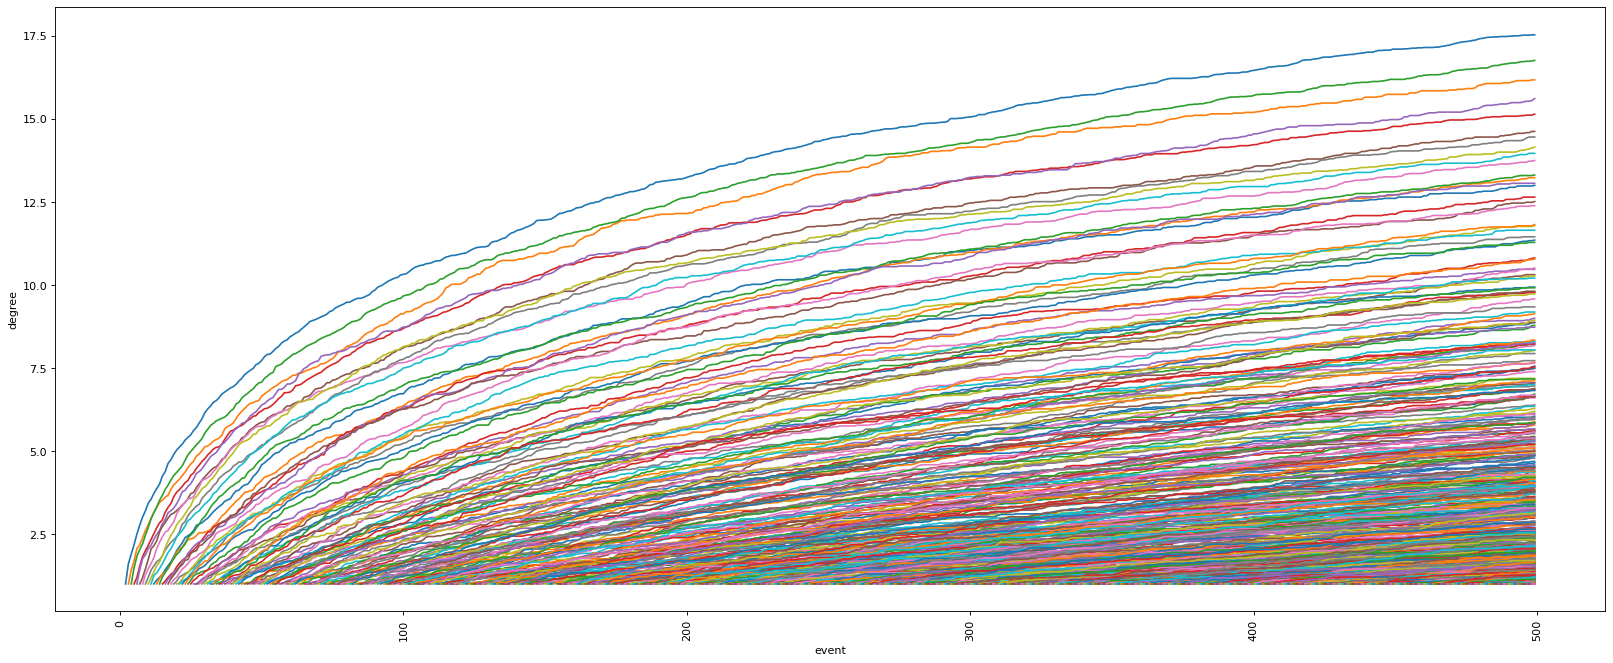

In [22]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.xlabel("event")
plt.ylabel("degree")
plt.xticks(rotation='vertical')

for x,y in zip(avg_x, avg_y):
    plt.plot(x,y)

plt.show()
    

In [23]:
# get u 
def get_u(df):        
    sum_deg = 0
    for i in avg_y:
        sum_deg += pow(i[-1], GAMMA)
    
    return sum_deg/NUM_EVENTS

u = get_u(df)
expected_alpha = ((1-GAMMA)*(2-P))/u
expected_beta =  1/(1-GAMMA)
print("u = ", u)

u =  0.996


In [24]:
# retrive alphas and betas 

alphas = []
betas = []
diffs_alpha= []
diffs_beta= []

#print("-- event -- \t-- alpha -- \t -- alpha-1/2 --")
for curr_e in range(len(avg_x)):
    x = avg_x[curr_e]
    y = avg_y[curr_e]
    
    alpha, beta = fit_trajectory(x, y)

        
    diff_alpha = "%.4f" % pow(float(alpha) - expected_alpha, 2)
    diff_beta = "%.4f" % pow(float(beta) - expected_beta, 2)
        
    alpha = "%.4f" % alpha
    beta = "%.4f" % beta
    
    alphas.append(float(alpha))
    betas.append(float(beta))

    diffs_alpha.append(float(diff_alpha))
    diffs_beta.append(float(diff_beta))
    #print(curr_e, "\t\t", alpha, "\t\t", diff )



results = pd.DataFrame({"event": range(2, NUM_EVENTS), "alpha": alphas, "beta": betas, "diff_alpha": diffs_alpha, "diff_beta": diffs_beta})
results

,event,alpha,beta,diff_alpha,diff_beta
0,2,0.4383,2.3363,1.1400,1.785700e+00
1,3,0.4743,2.2753,1.0644,1.626400e+00
2,4,0.8055,1.7767,0.4908,6.032000e-01
3,5,0.8443,1.7199,0.4379,5.183000e-01
4,6,1.0265,1.6005,0.2299,3.607000e-01
...,...,...,...,...,...
493,495,0.0071,1.0071,2.2467,1.000000e-04
494,496,0.0019,1064.6799,2.2624,1.131415e+06
495,497,0.0034,1150.7501,2.2578,1.321925e+06
496,498,0.0279,1.0279,2.1849,8.000000e-04


0.00012451081752712454 8349.400880221325


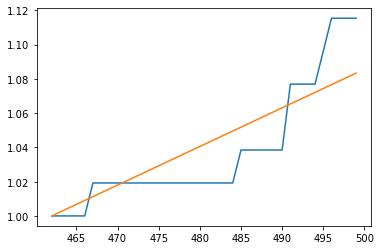

In [25]:
# print one function with his fitting for the  given event 
curr_e = 460
x = avg_x[curr_e]
y = avg_y[curr_e]

alpha, beta = fit_trajectory(x, y)
print(alpha, beta)
fit_y = theoretical_func(x, alpha, beta, np.int64(x[0]))

plt.plot(x,y)
plt.plot(x,fit_y)
plt.show()

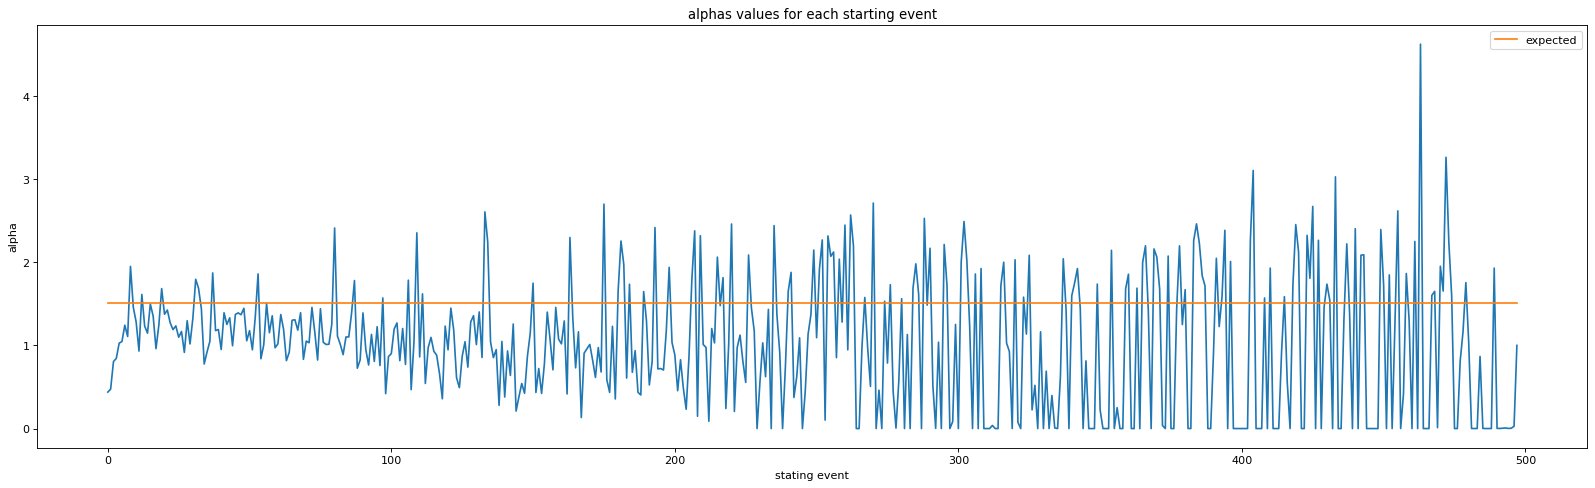

In [26]:
# plot alpha
plt.figure(figsize=(25, 7), dpi=80)
plt.title("alphas values for each starting event")
plt.xlabel("stating event")
plt.ylabel("alpha")
plt.plot([i for i in range(len(results))], results["alpha"])
plt.plot([i for i in range(len(results))], [expected_alpha for i in range(len(results))], label="expected")
plt.legend()
plt.show()

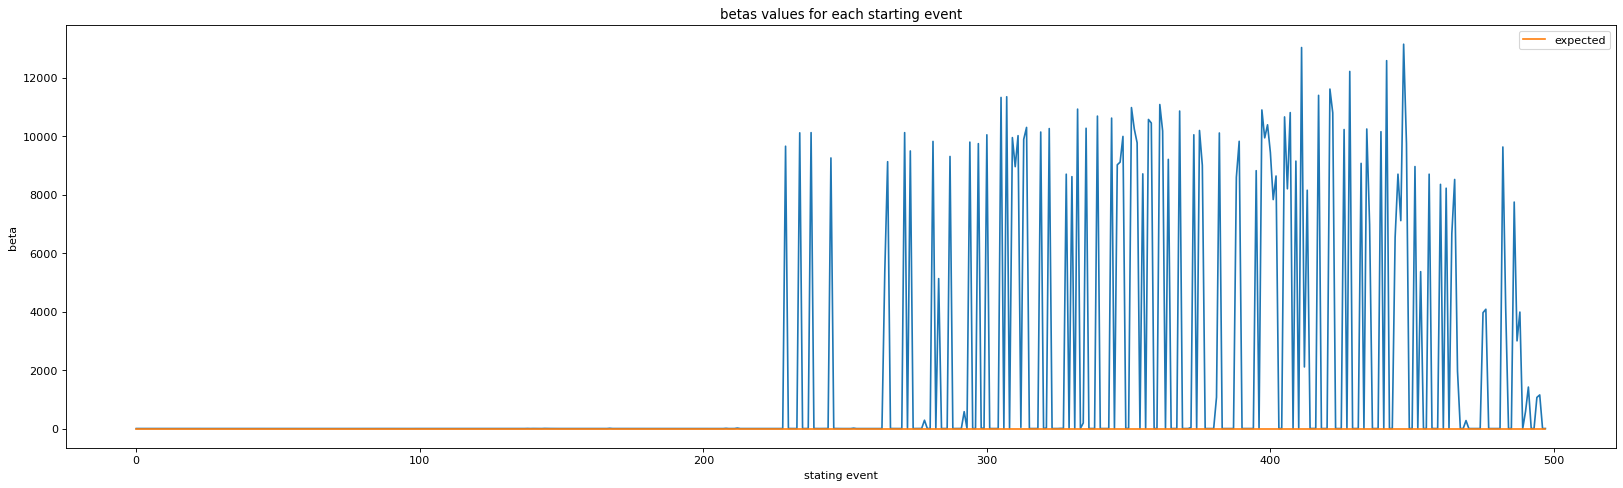

In [27]:
# plot beta
plt.figure(figsize=(25, 7), dpi=80)
plt.title("betas values for each starting event")
plt.xlabel("stating event")
plt.ylabel("beta")
plt.plot([i for i in range(len(results))], results["beta"])
plt.plot([i for i in range(len(results))], [expected_alpha for i in range(len(results))], label="expected")
plt.legend()
plt.show()

In [28]:
# data infos
print(" -- alpha must be", "%.4f" % expected_alpha, "--")
print(" -- beta must be", "%.4f" % expected_beta, "--\n")

# how many alpha differ from the  expectation of the given tolerance
print("-- #alphas such that alpha-((1-u)*(2-P))/u < tolerance -- ")
tolerance = 0.0
while tolerance <= 2:
    print("tolerance =", "%.1f"%tolerance, "-> #aphas =", len(results[pow(results["diff_alpha"],1/2) <= tolerance]))
    tolerance += 0.1
    
print()

print("-- #betas such that beta-((1-GAMMA) < tolerance -- ")
tolerance = 0.0
while tolerance <= 2:
    print("tolerance <=", "%.1f"%tolerance, "-> #betas =", len(results[pow(results["diff_beta"],1/2) <= tolerance]))
    tolerance += 0.1

 -- alpha must be 1.5060 --
 -- beta must be 1.0000 --

-- #alphas such that alpha-((1-u)*(2-P))/u < tolerance -- 
tolerance = 0.0 -> #aphas = 1
tolerance = 0.1 -> #aphas = 31
tolerance = 0.2 -> #aphas = 69
tolerance = 0.3 -> #aphas = 110
tolerance = 0.4 -> #aphas = 147
tolerance = 0.5 -> #aphas = 196
tolerance = 0.6 -> #aphas = 239
tolerance = 0.7 -> #aphas = 275
tolerance = 0.8 -> #aphas = 302
tolerance = 0.9 -> #aphas = 322
tolerance = 1.0 -> #aphas = 341
tolerance = 1.1 -> #aphas = 360
tolerance = 1.2 -> #aphas = 371
tolerance = 1.3 -> #aphas = 379
tolerance = 1.4 -> #aphas = 382
tolerance = 1.5 -> #aphas = 392
tolerance = 1.6 -> #aphas = 496
tolerance = 1.7 -> #aphas = 496
tolerance = 1.8 -> #aphas = 497
tolerance = 1.9 -> #aphas = 497

-- #betas such that beta-((1-GAMMA) < tolerance -- 
tolerance <= 0.0 -> #betas = 91
tolerance <= 0.1 -> #betas = 99
tolerance <= 0.2 -> #betas = 115
tolerance <= 0.3 -> #betas = 137
tolerance <= 0.4 -> #betas = 150
tolerance <= 0.5 -> #betas = 178


In [29]:
results.sort_values(by="diff_alpha",  ascending=True)

,event,alpha,beta,diff_alpha,diff_beta
56,58,1.5045,1.3723,0.0000,1.386000e-01
15,17,1.4983,1.3943,0.0001,1.555000e-01
289,291,1.4842,1.2514,0.0005,6.320000e-02
274,276,1.5316,1.2222,0.0007,4.940000e-02
216,218,1.4785,1.4319,0.0008,1.866000e-01
...,...,...,...,...,...
464,466,0.0001,6667.8422,2.2678,4.444678e+07
433,435,3.0271,1.0000,2.3136,0.000000e+00
404,406,3.1047,1.0000,2.5557,0.000000e+00
472,474,3.2630,1.0000,3.0868,0.000000e+00


In [30]:
results.sort_values(by="diff_beta",  ascending=True)

,event,alpha,beta,diff_alpha,diff_beta
301,303,2.0026,1.0000,0.2466,0.000000e+00
207,209,2.3781,1.0000,0.7606,0.000000e+00
385,387,2.2283,1.0000,0.5216,0.000000e+00
485,487,0.0018,1.0018,2.2627,0.000000e+00
454,456,1.2726,1.0000,0.0545,0.000000e+00
...,...,...,...,...,...
421,423,0.0002,11608.2311,2.2676,1.347278e+08
428,430,0.0002,12210.2408,2.2676,1.490656e+08
441,443,0.0002,12579.1207,2.2675,1.582091e+08
411,413,0.0002,13027.5996,2.2675,1.696923e+08


# General Fitting

In [31]:
# errors
import sys
from scipy.optimize import minimize 
import math

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_A(params):
    # print(params)
    opt_alpha, opt_beta = params
    err = 0
    for curr_e in range(len(avg_x)):
        x,y = avg_x[curr_e], avg_y[curr_e]
        for e in range(curr_e, len(x)):
            f_star = theoretical_func(np.int64(e), opt_alpha, opt_beta, np.int64(x[curr_e]))
            if("-inf" != str(f_star) and "inf" != str(f_star) and not (math.isnan(f_star))):
                err += pow(abs(f_star - y[e]), 2)
                    
    sys.stdout.write('\r'+ "optimizing A function with -> params: " + str(params) +", error: "+ str(err))
    return err

SUBSET_SIZE = 200 # the next error function works on all events, choose the number of event to be considered 

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_C(params):
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 

    err = 0
    for curr_e in range(len(avg_x)):
        x,y = avg_x[curr_e], avg_y[curr_e]
        alpha, beta = alpha, beta = fit_trajectory(x, y)
        fit_y  = theoretical_func(x, alpha, beta, np.int64(x[0]))
        
        
        all_events = [e for e in range(curr_e, len(avg_x)-1)]
        next_events = all_events
        n = (len(next_events))//size
            
        if(n>0):
            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]
        
            for e in events_subset:
                if(e>curr_e):                
                    f_star = theoretical_func(np.int64(e), opt_alpha, opt_beta, np.int64(x[0]))
                    if("-inf" != str(f_star) and "inf" != str(f_star) and not (math.isnan(f_star))):
                        err += pow(abs(f_star - theoretical_func(np.int64(e), alpha, beta, np.int64(x[0]))), 2)
                        
    sys.stdout.write('\r'+ "optimizing C function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err



In [32]:
## optimize alpha* and beta* for each error function defined above 
alphas_opt,betas_opt, errs = [],[],[]

start_params = [1, 1]
bnds = ((0, None), (1, None))

# retrieve alpha* and beta* minimizing the associated function and
    # compute the error made by the optimized parameters 

result_A = minimize(err_f_A, start_params, bounds=bnds)
fitted_params_A = result_A.x
alphas_opt.append(fitted_params_A[0])
betas_opt.append(fitted_params_A[1])
errs.append(err_f_A(fitted_params_A))
print()


result_C = minimize(err_f_C, [1, 1], bounds=bnds)
fitted_params_C = result_C.x
alphas_opt.append(fitted_params_C[0])
betas_opt.append(fitted_params_C[1])
errs.append(err_f_C(fitted_params_C))
print()

# optimizing A function with -> params: [4.94508748 1.00330144], error: 101462.55321939185
# optimizing C function with 200 events -> params: [0.71552378 2.14158246], error: 12717.860695442623


optimizing A function with -> params: [4.03682649 1.        ], error: 223849.71002128615
optimizing C function with 200 events -> params: [1.99102678 1.18518033], error: 6549.5453698189478


# Compare this result with ACTIVE data 
-  for the most trajectories in real data: Beta = 1, so GAMMA = 0

In [2]:
# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [3]:
HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3
EVENTS = get_collabs_event()
ALL_EVENTS = get_allEvents(EVENTS)

YEARS = get_str_years_event()

# get rid of misleading years
YEARS_TO_CONSIDER = YEARS[1: -6]
EVENTS_TO_CONSIDER = EVENTS[1: -6]

In [4]:
# gen network's opt params
alphas_opt = [4.03682649, 1.99102678]
betas_opt = [1, 1.18518033]
errs = [223849.71002128615, 6549.5453698189478]

print()
print(pd.DataFrame([[errs[i], alphas_opt[i], betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_C", ], ["ERROR", "alpha", "beta",]))


                 ERROR     alpha     beta
err_f_A  223849.710021  4.036826  1.00000
err_f_C    6549.545370  1.991027  1.18518


In [5]:
# fit the real trajectories with the generated network's general alpha* and beta*

error_f_labels = ["A", "C"] 
error_fit_functions = {}

for i in range(len(error_f_labels)):
    # get general error fitted functions by starting year
    functions_by_start_y = [] # contains fitted error functions for each year 
    for start_y in YEARS_TO_CONSIDER:
        curr_x = EVENTS[YEARS.index(start_y)]  
        x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
        
        xdata = [e for e in range(x[0], x[-1])] # xdata is the list of events
        general_fit_y = theoretical_func(xdata, alphas_opt[i], betas_opt[i], curr_x)
        functions_by_start_y.append(general_fit_y)

    error_fit_functions[error_f_labels[i]] = functions_by_start_y

In [6]:
# real data's general params for errors A and C

r_alphas_opt = [6.929222, 7.993638]
r_betas_opt = [1, 1]
r_errs = [ 27755.784282, 444951.754961]

print()
print(pd.DataFrame([[r_errs[i], r_alphas_opt[i], r_betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_C", ], ["ERROR", "alpha", "beta",]))


                 ERROR     alpha  beta
err_f_A   27755.784282  6.929222     1
err_f_C  444951.754961  7.993638     1


In [7]:
# fit the real trajectories with the real alpha* and beta*
r_error_f_labels = ["r_A", "r_C"] 
r_error_fit_functions = {}

for i in range(len(r_error_f_labels)):
    # get general error fitted functions by starting year
    functions_by_start_y = [] # contains fitted error functions for each year 
    for start_y in YEARS_TO_CONSIDER:
        curr_x = EVENTS[YEARS.index(start_y)]  
        x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
        
        xdata = [e for e in range(x[0], x[-1])] # xdata is the list of events
        general_fit_y = theoretical_func(xdata, r_alphas_opt[i], r_betas_opt[i], curr_x)
        functions_by_start_y.append(general_fit_y)

    r_error_fit_functions[r_error_f_labels[i]] = functions_by_start_y

# comparing error made on real data fitting 

In [48]:
# given the start_y to consider it plots the real curver, the error fitted one and the average fitted toghether 

g_err_A = 0 # error made by the generated network fit made on error A
r_err_A = 0 # error made by the real network fit made on error A

g_err_C = 0 # error made by the generated network fit made on error C
r_err_C = 0 # error made by the real network fit made on error C

for start_y in YEARS_TO_CONSIDER:

    j = YEARS_TO_CONSIDER.index(start_y)
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 

    xdata = [e for e in range(x[0],x[-1])]

    # error functions with generated network's optima params
    g_err_f_A = error_fit_functions[error_f_labels[0]][j]
    g_err_f_C = error_fit_functions[error_f_labels[1]][j]

    # error functions A and C on real trajectories's optimal params
    r_err_f_A = r_error_fit_functions[r_error_f_labels[1]][j]
    r_err_f_C = r_error_fit_functions[r_error_f_labels[1]][j]

    # print(x, len(y), len(g_err_f_A), len(g_err_f_C), len(r_err_f_A), len(r_err_f_C))
    
    i = 0 
    for e in x:
        if(e-x[0] == 0):
            g_err_A += pow(abs(g_err_f_A[e-x[0]] - y[i]), 2)
            r_err_A += pow(abs(r_err_f_A[e-x[0]] - y[i]), 2)
            
            g_err_C += pow(abs(g_err_f_C[e-x[0]] - y[i]), 2)
            r_err_C += pow(abs(r_err_f_C[e-x[0]] - y[i]), 2)
        else: 
            g_err_A += pow(abs(g_err_f_A[e-x[0]-1] - y[i]), 2)
            r_err_A += pow(abs(r_err_f_A[e-x[0]-1] - y[i]), 2)
            
            g_err_C += pow(abs(g_err_f_C[e-x[0]-1] - y[i]), 2)
            r_err_C += pow(abs(r_err_f_C[e-x[0]-1] - y[i]), 2)
        i+=1

print("The error on real data made by the generated network fit made on error A is:", g_err_A)
print("The error on real data made by the real network fit made on error A is:", r_err_A)

print("The error on real data made by the generated network fit made on error C is:", g_err_C)
print("The error on real data made by the real network fit made on error C is:", r_err_C)

The error on real data made by the generated network fit made on error A is: 59764.96894653284
The error on real data made by the real network fit made on error A is: 35095.10965296952
The error on real data made by the generated network fit made on error C is: 79873.52805830096
The error on real data made by the real network fit made on error C is: 35095.10965296952


# Plotting all fitting functions along real trajectories

In [42]:
# plot all
# given the start_y to consider it plots the real curver, the error fitted one and the average fitted toghether 
def plot_all(start_y):
    plt.figure(figsize=(25, 10), dpi=80)
    plt.title("compare general fitting error functions, for real and generated data, for the starting year " + start_y + " for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS)  +  "\n", fontdict = {'fontsize' : 12})
    plt.xlabel("#new_collabs as event")
    plt.ylabel("#num_Collaborations")
    plt.xticks(rotation='vertical')

    j = YEARS_TO_CONSIDER.index(start_y)
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
    plt.plot(x,y, label="real data")

    xdata = [e for e in range(x[0],x[-1])]

    for i in range(len(error_f_labels)):
        err_f = error_fit_functions[error_f_labels[i]][j]
        plt.plot(xdata, err_f, label="error fit function "+ error_f_labels[i])

    for i in range(len(r_error_f_labels)):
        err_f = r_error_fit_functions[r_error_f_labels[i]][j]
        plt.plot(xdata, err_f, label="error fit function "+ r_error_f_labels[i])

    plt.xticks(rotation='vertical')    
    plt.legend(loc='upper left')    
    plt.xticks(x, YEARS[YEARS.index(start_y):])
    plt.show()

- error fit function A -> fit made using error A on the generates trajectories
- error fit function C -> fit made using error C on the generates trajectories
- error fit function r_A -> fit made using error A on the real trajectories
- error fit function r_C -> fit made using error C on the real trajectories

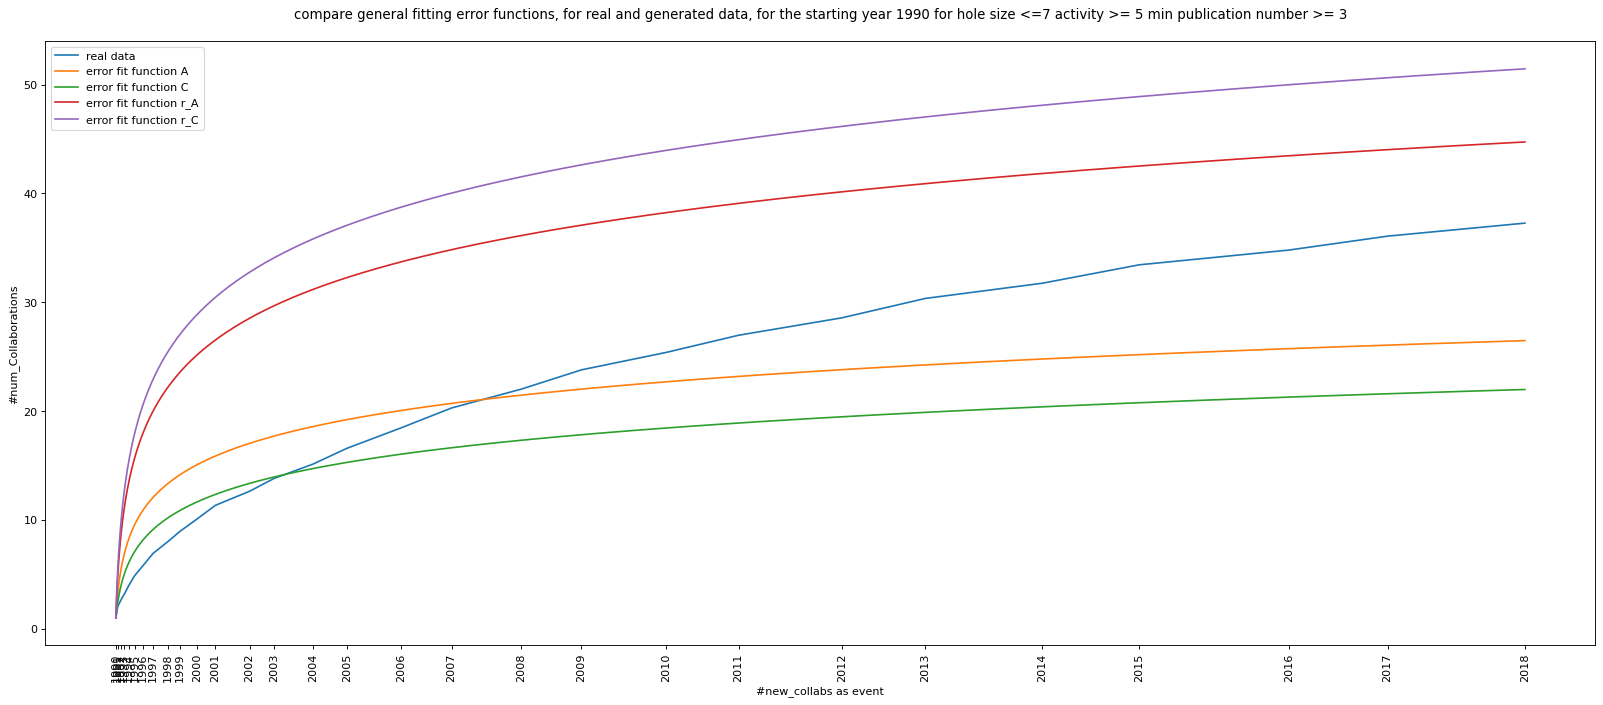

In [43]:
plot_all("1990")

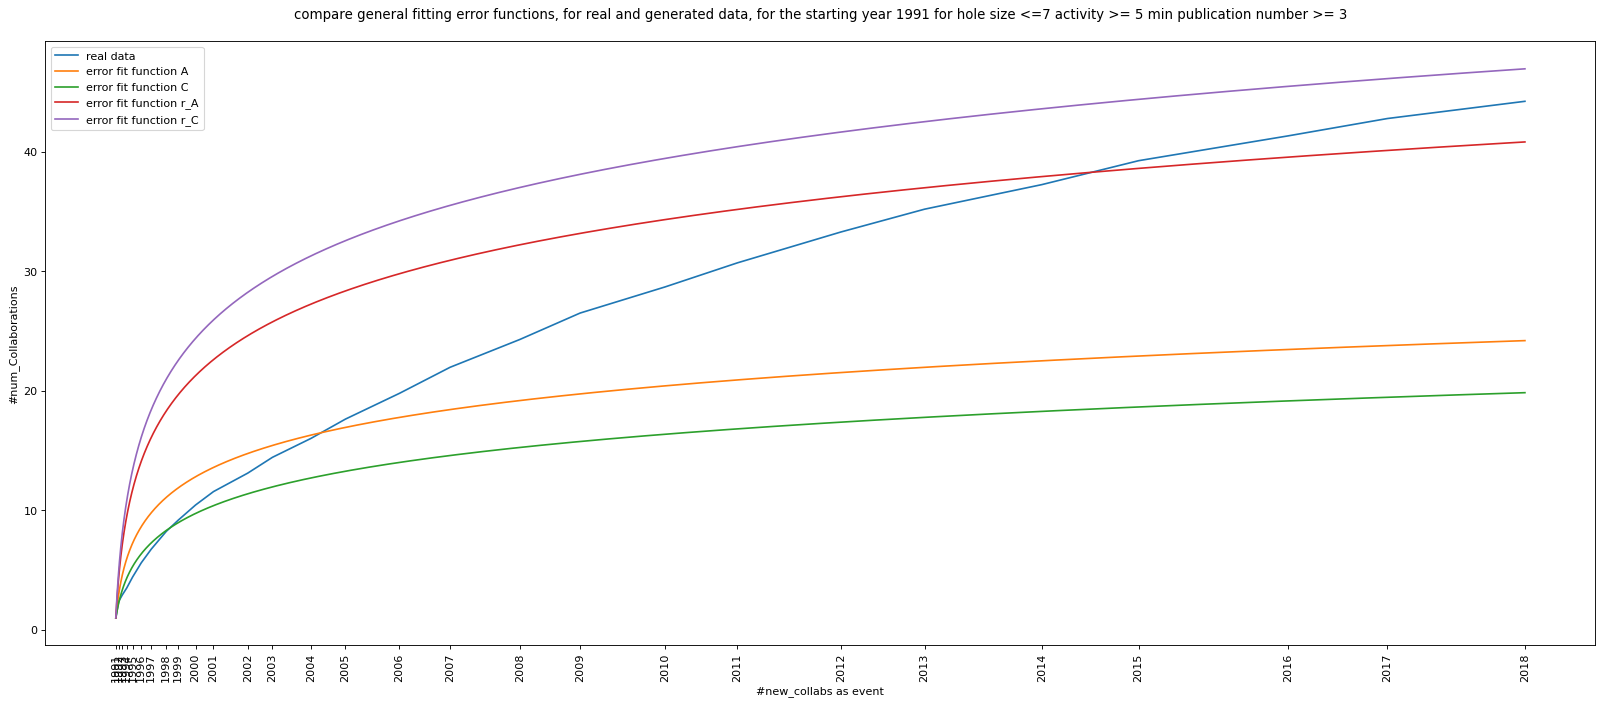

In [44]:
plot_all("1991")

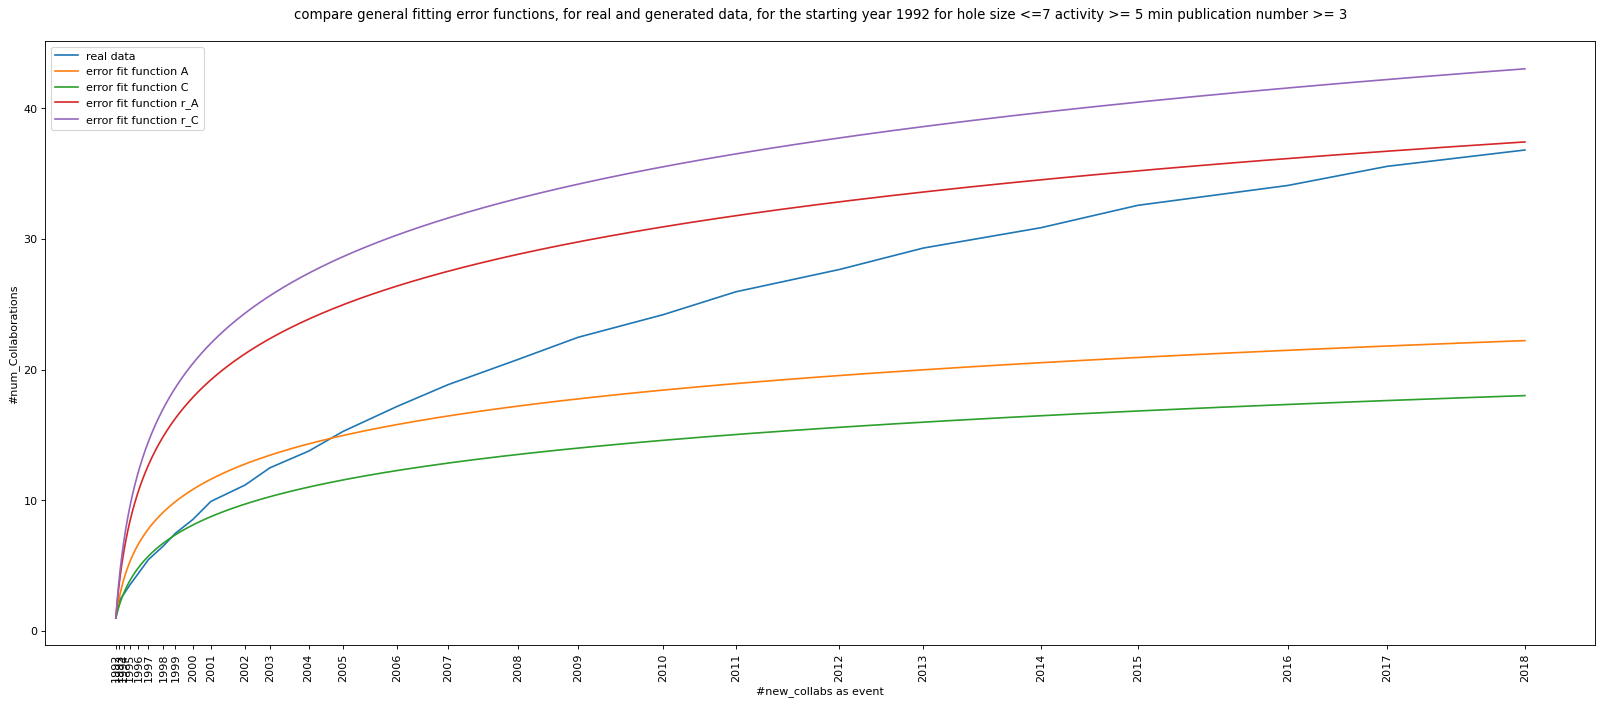

In [45]:
plot_all("1992")

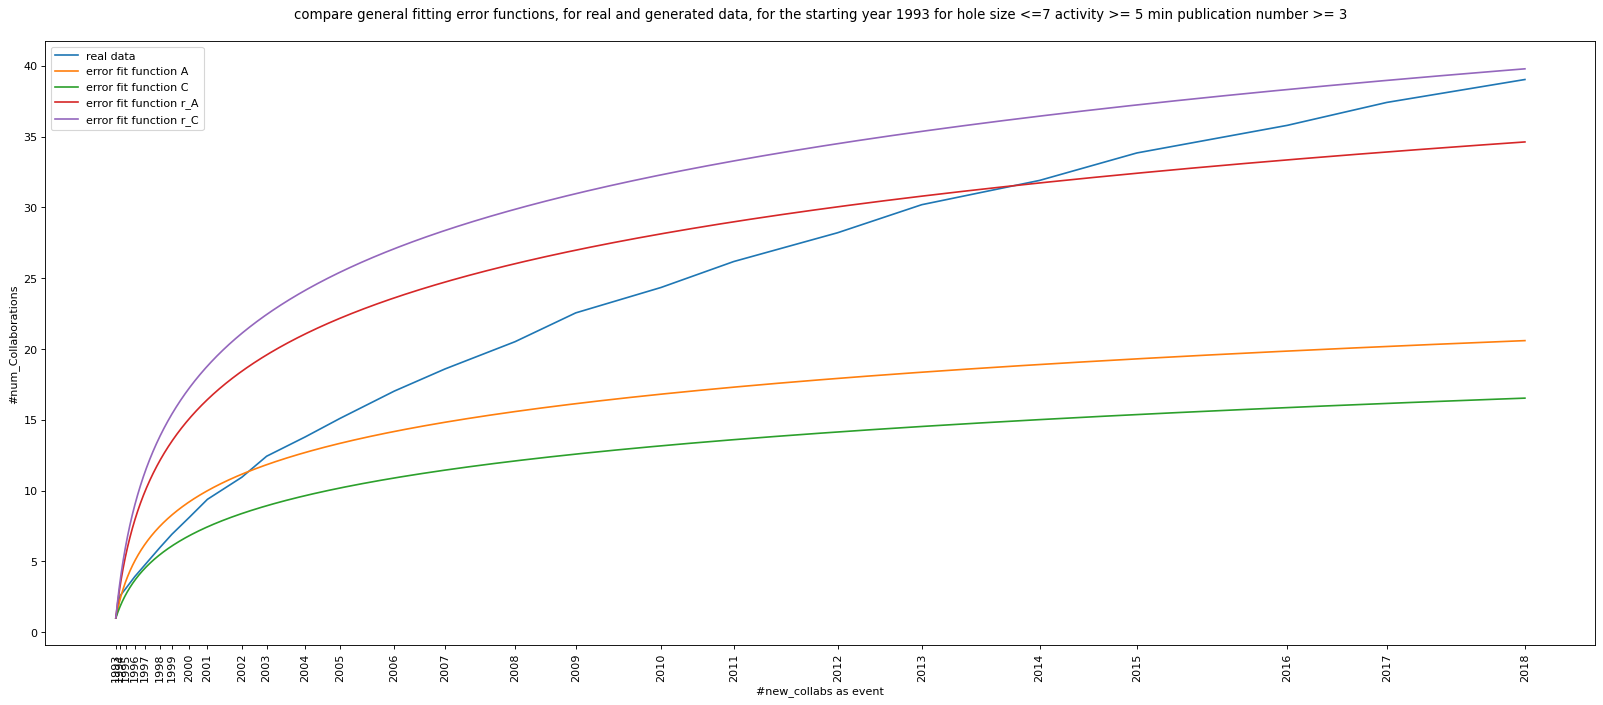

In [46]:
plot_all("1993")

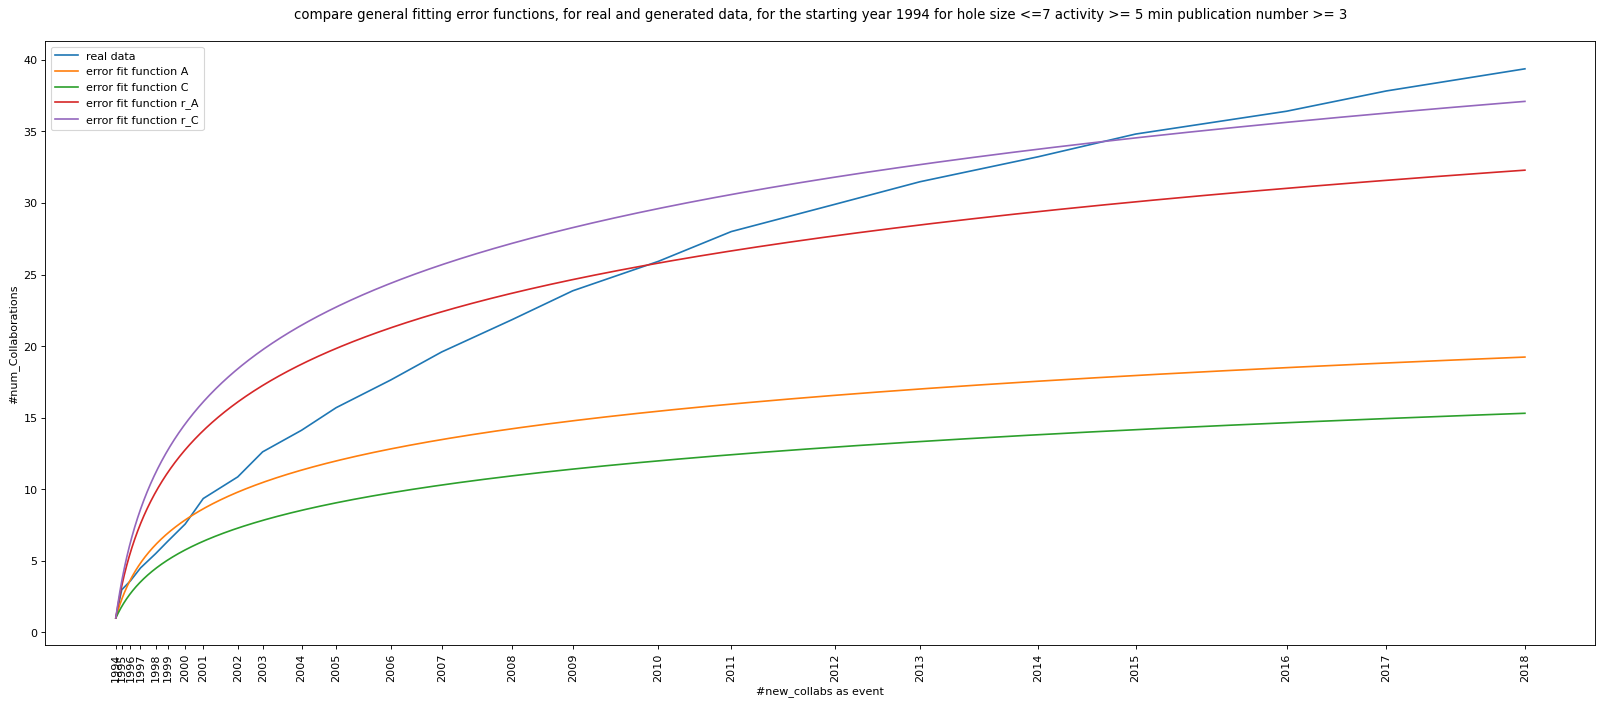

In [47]:
plot_all("1994")

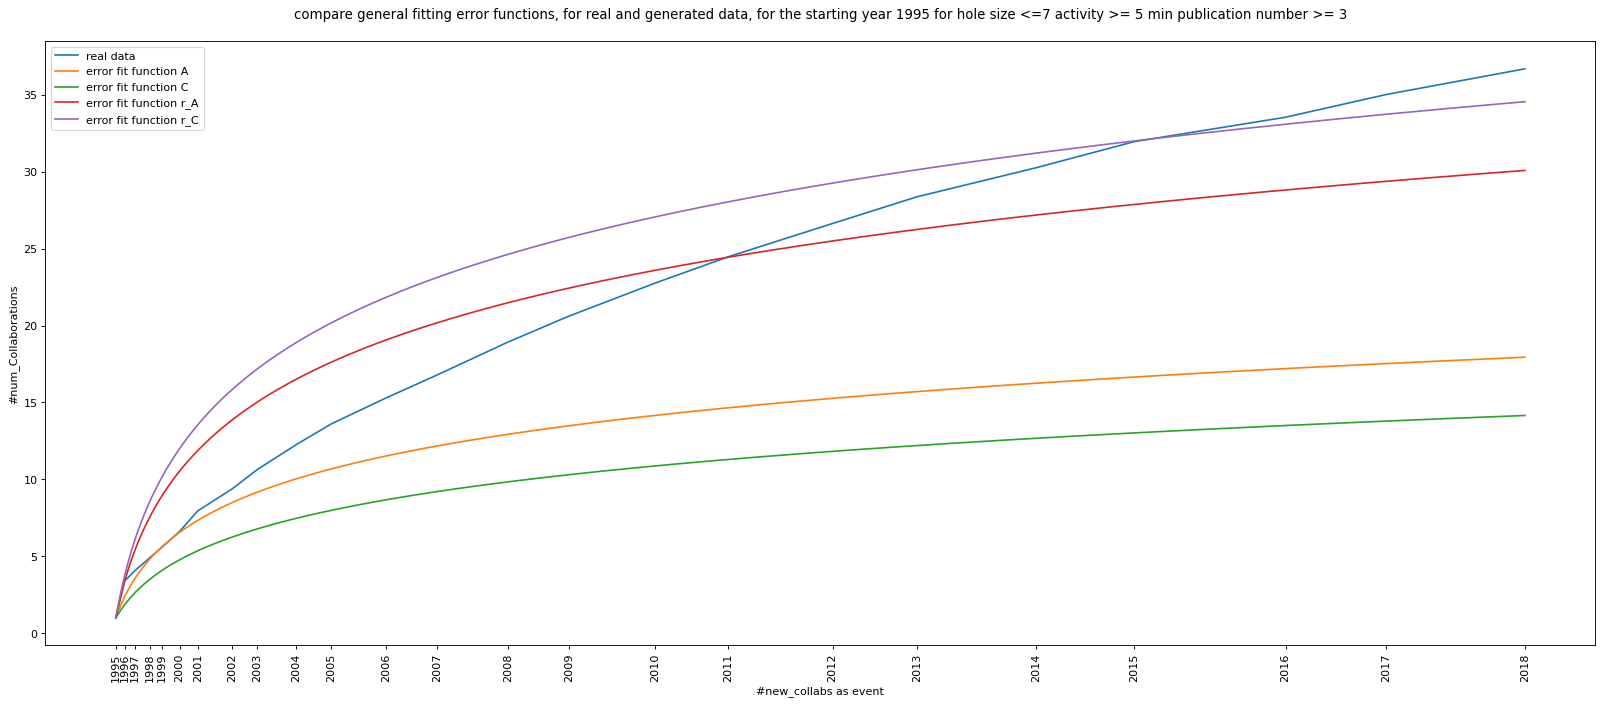

In [48]:
plot_all("1995")

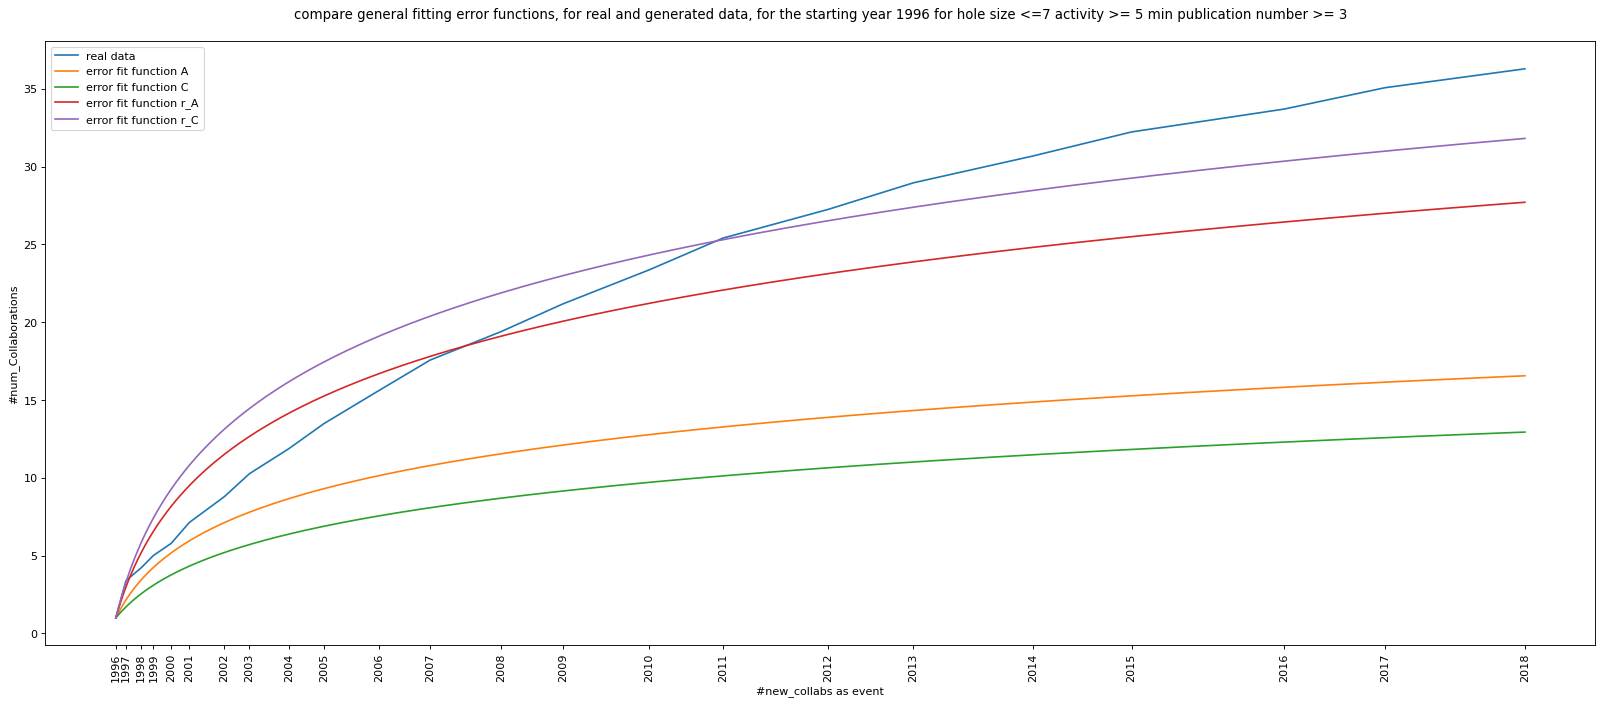

In [49]:
plot_all("1996")

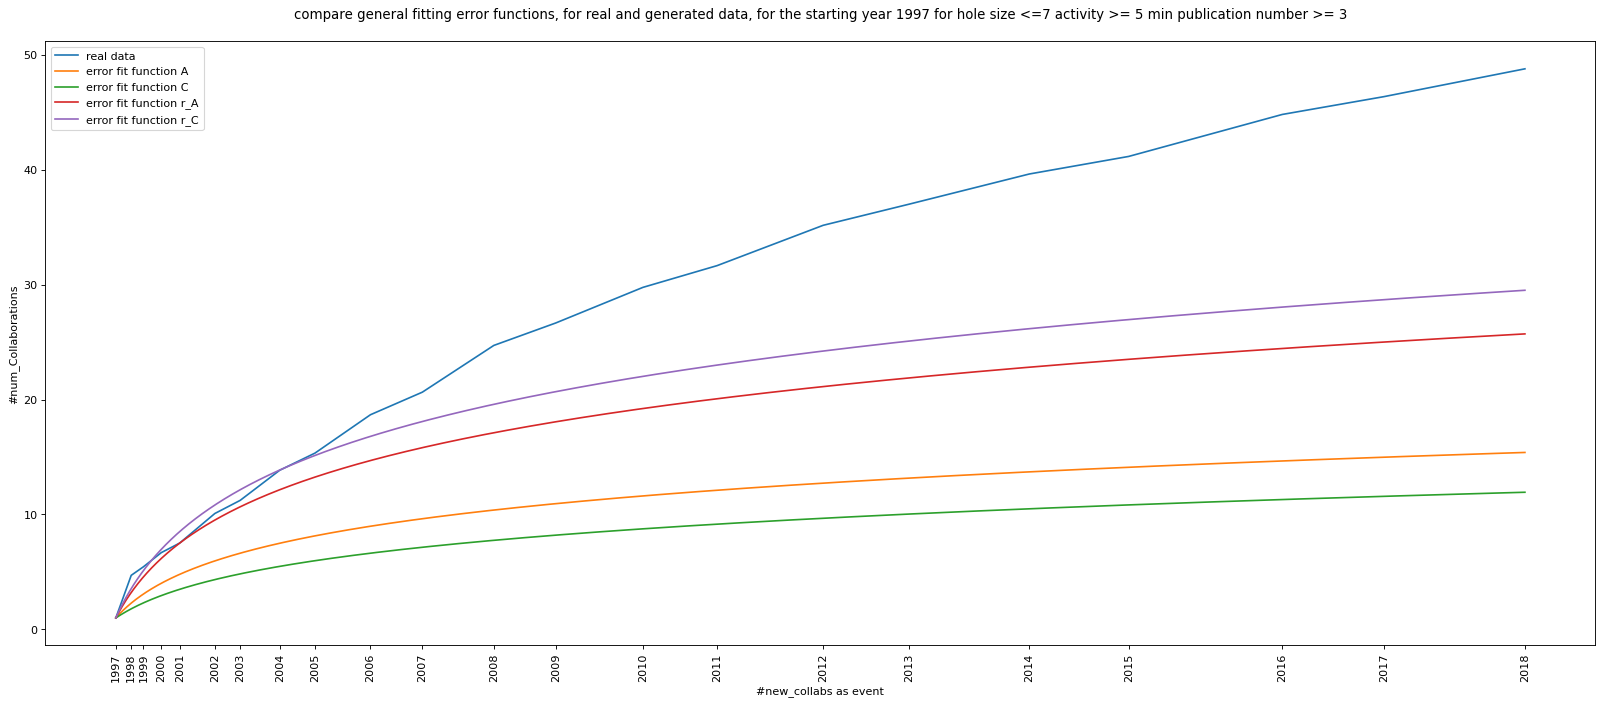

In [50]:
plot_all("1997")

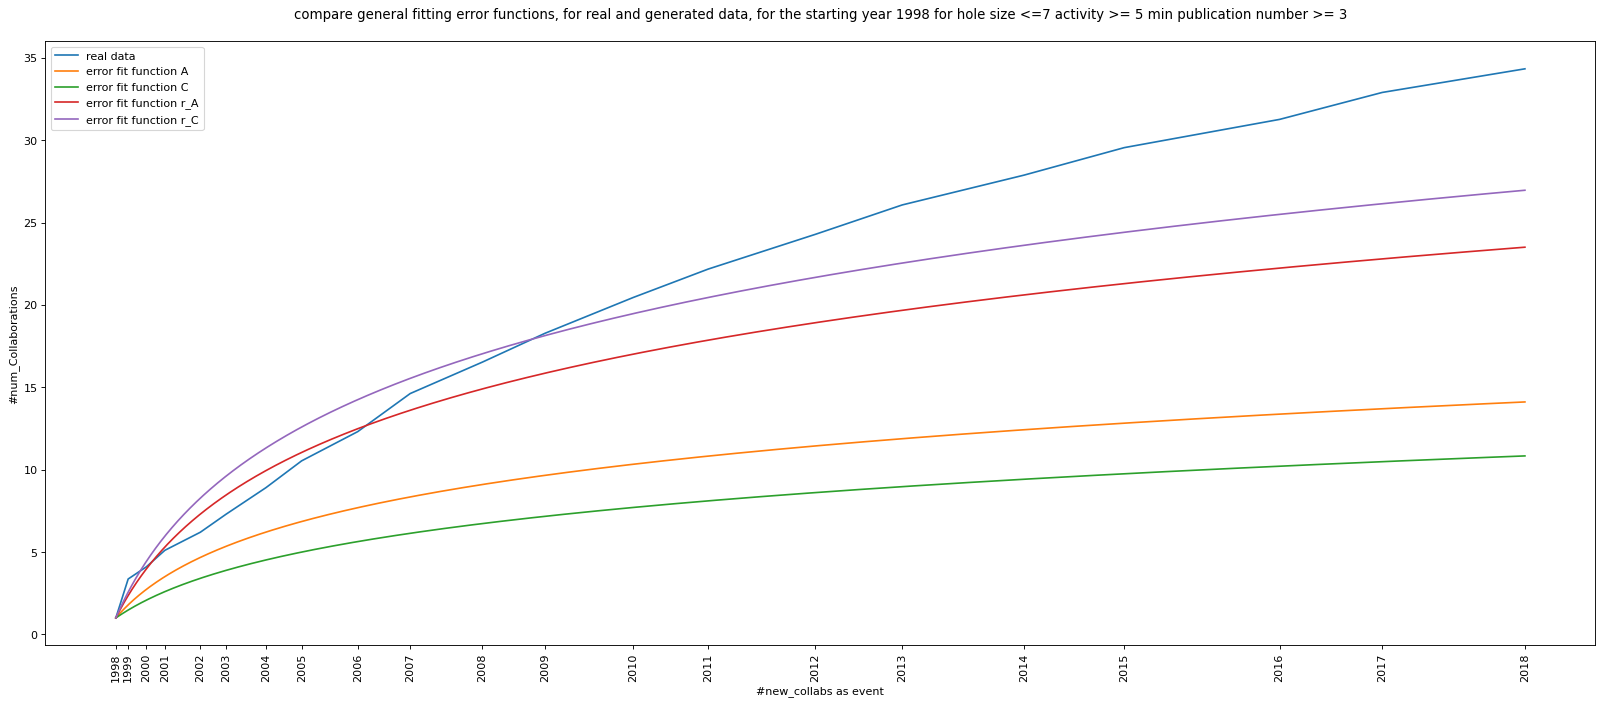

In [51]:
plot_all("1998")

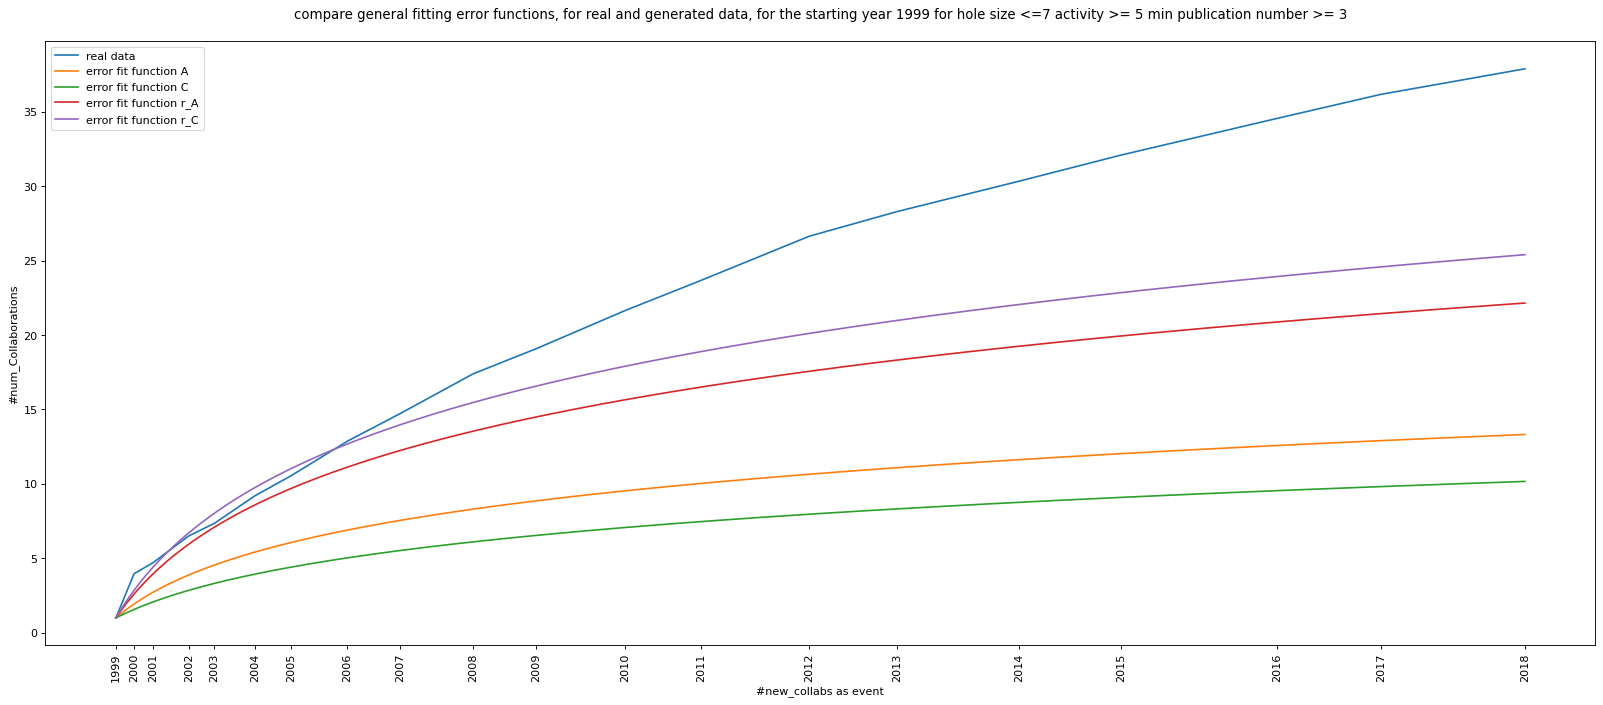

In [52]:
plot_all("1999")

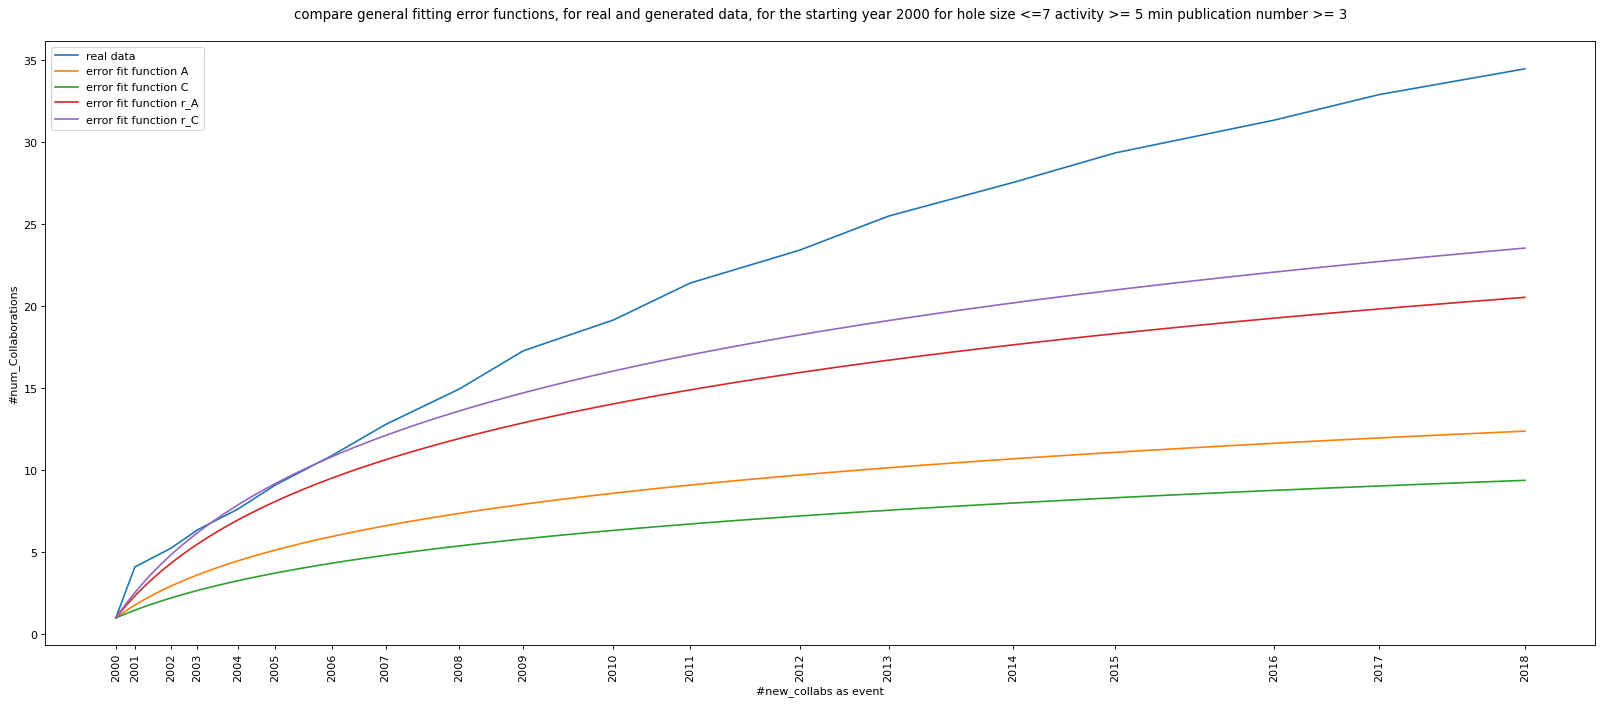

In [53]:
plot_all("2000")

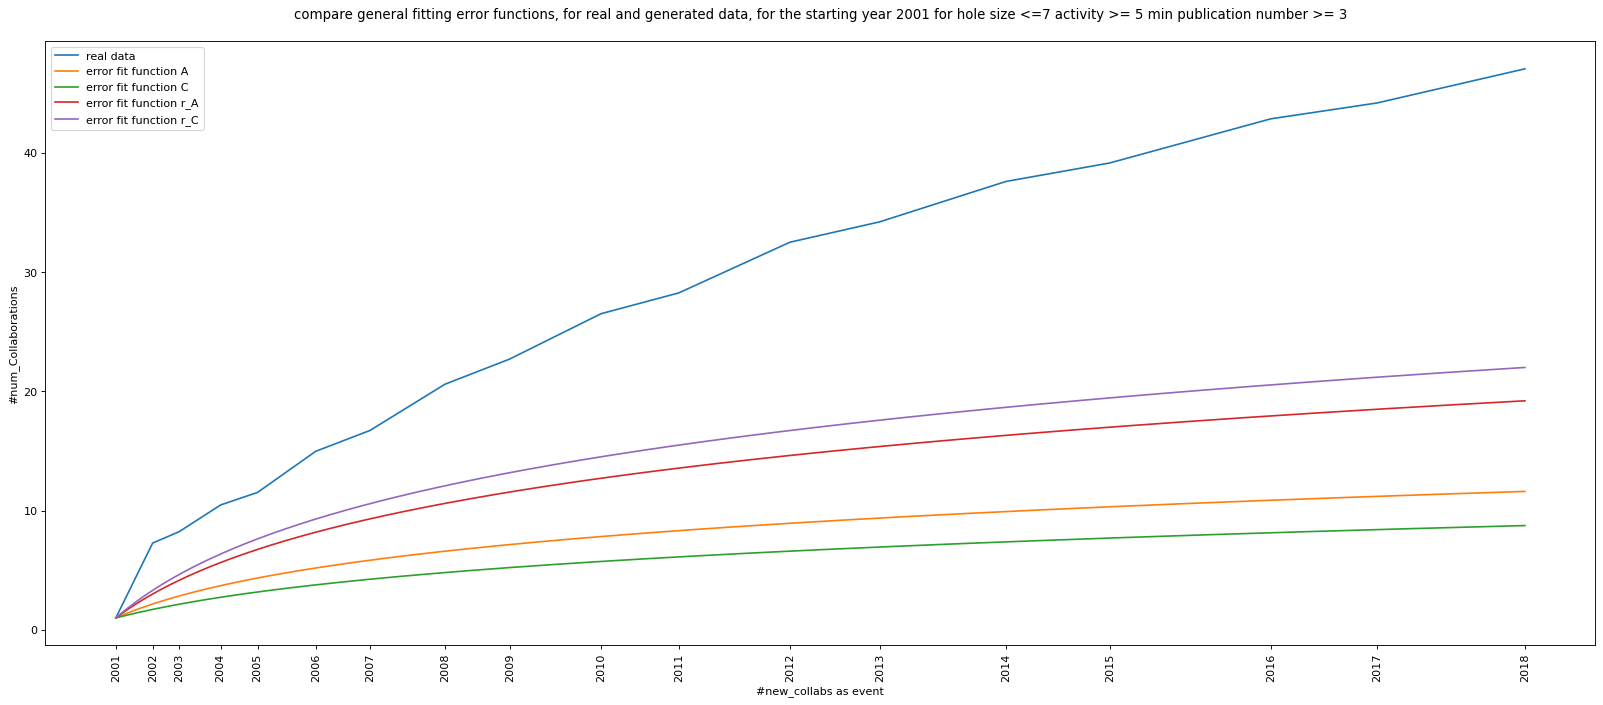

In [54]:
plot_all("2001")

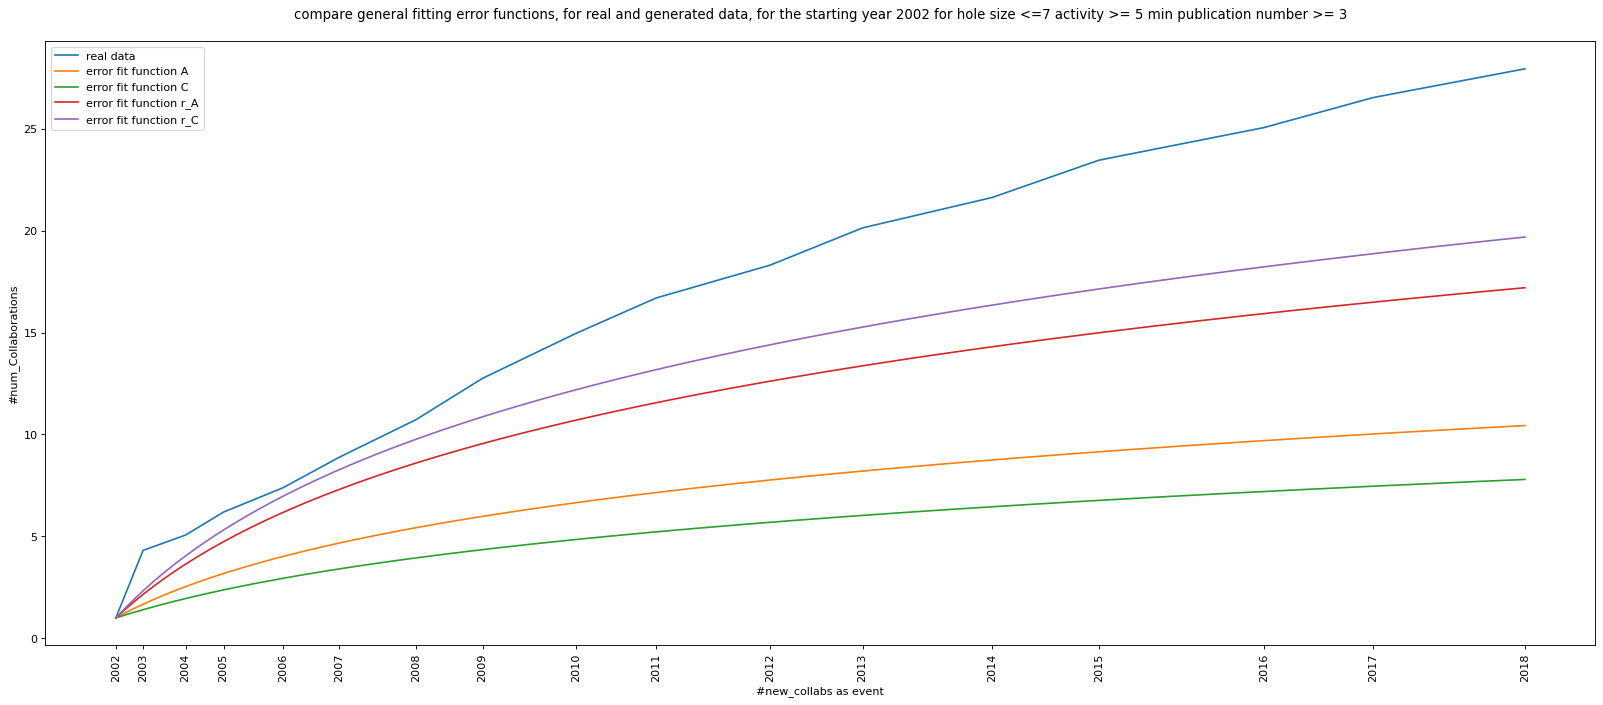

In [55]:
plot_all("2002")

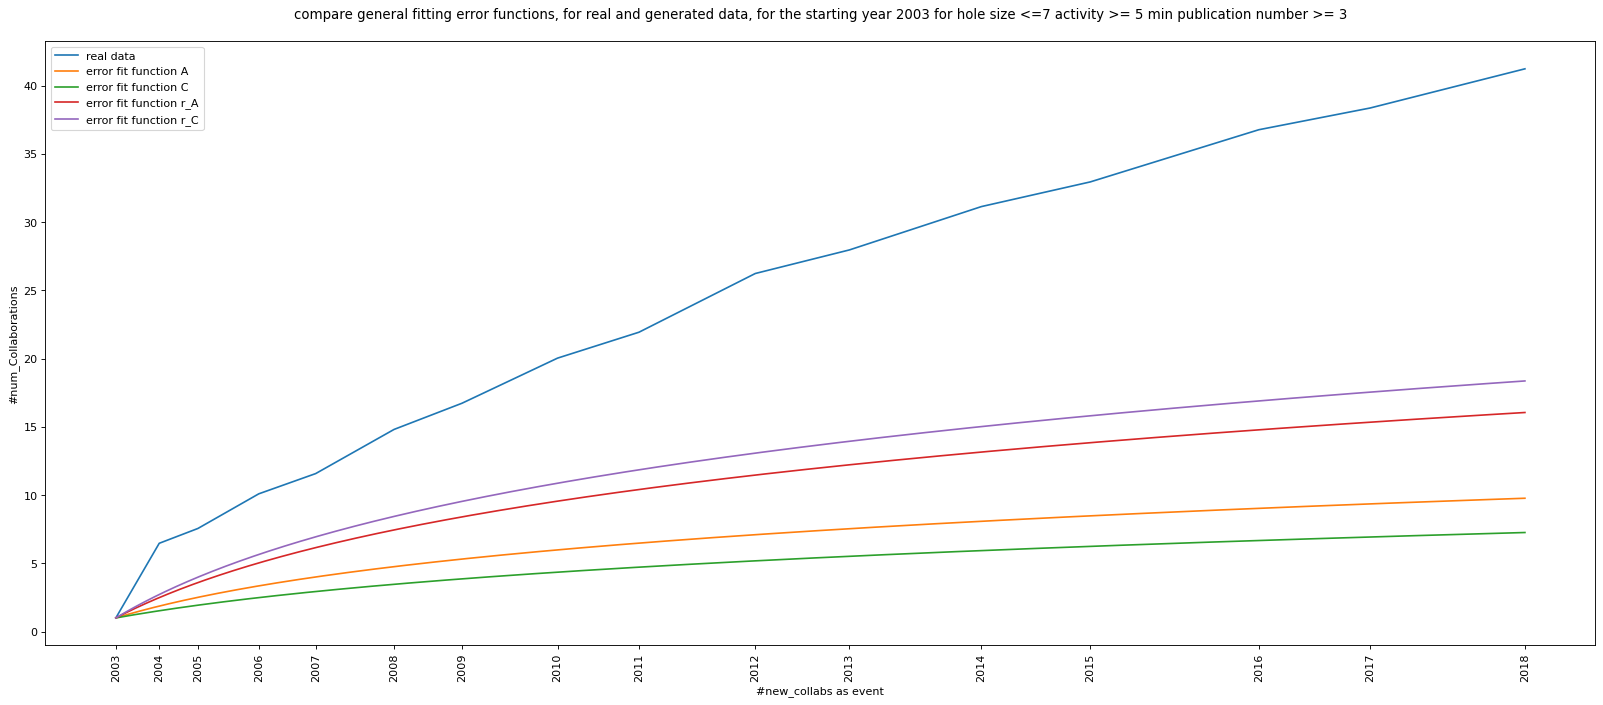

In [56]:
plot_all("2003")

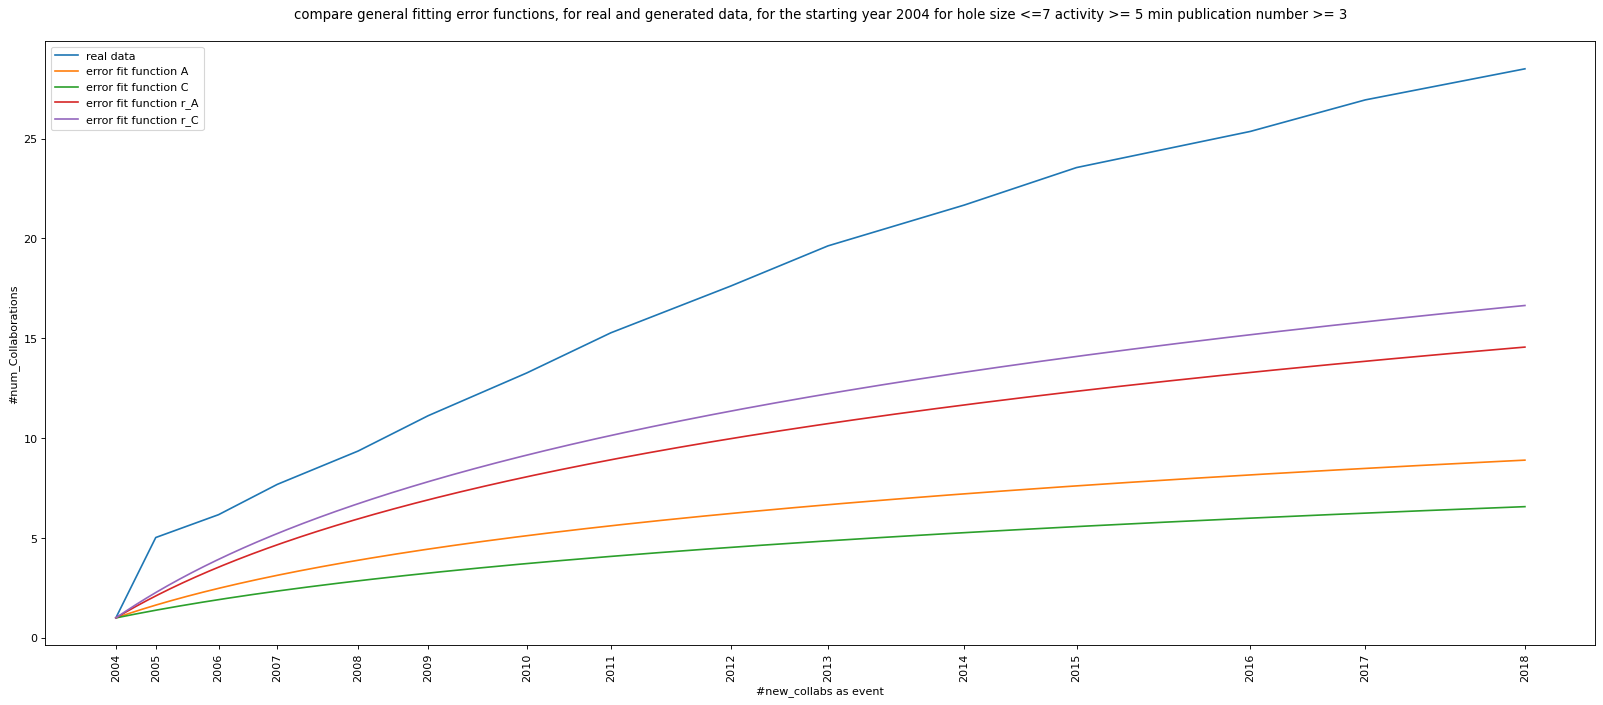

In [57]:
plot_all("2004")

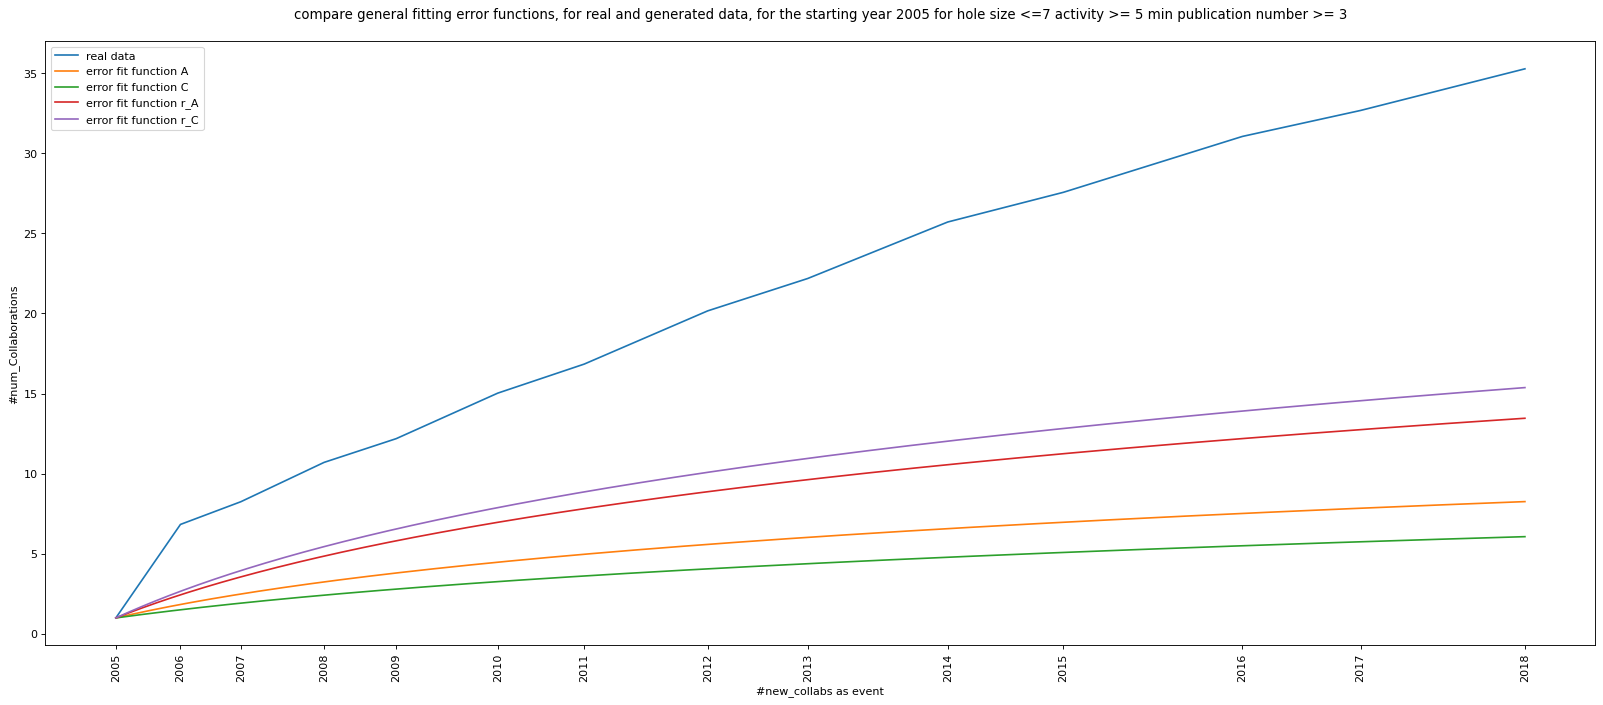

In [58]:
plot_all("2005")

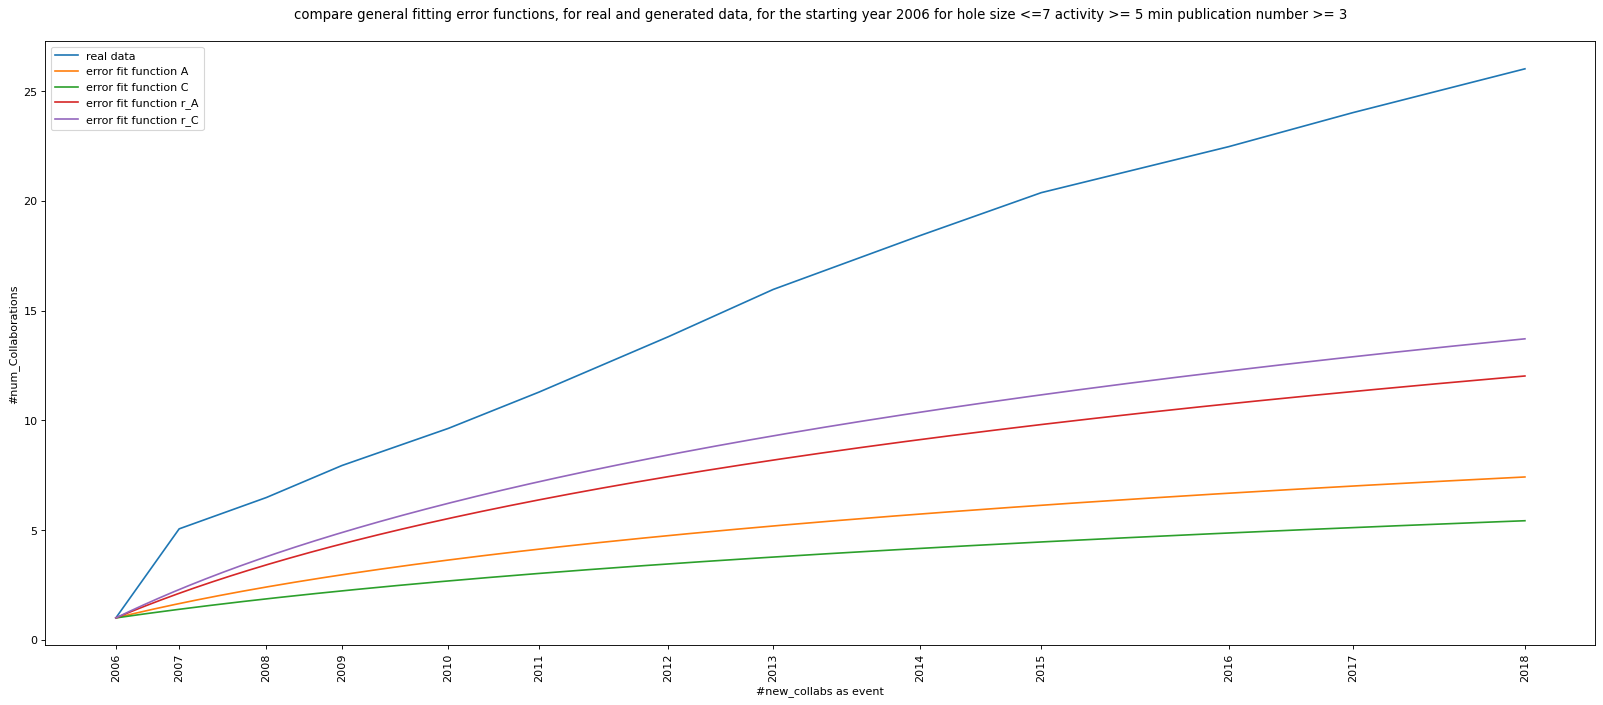

In [59]:
plot_all("2006")

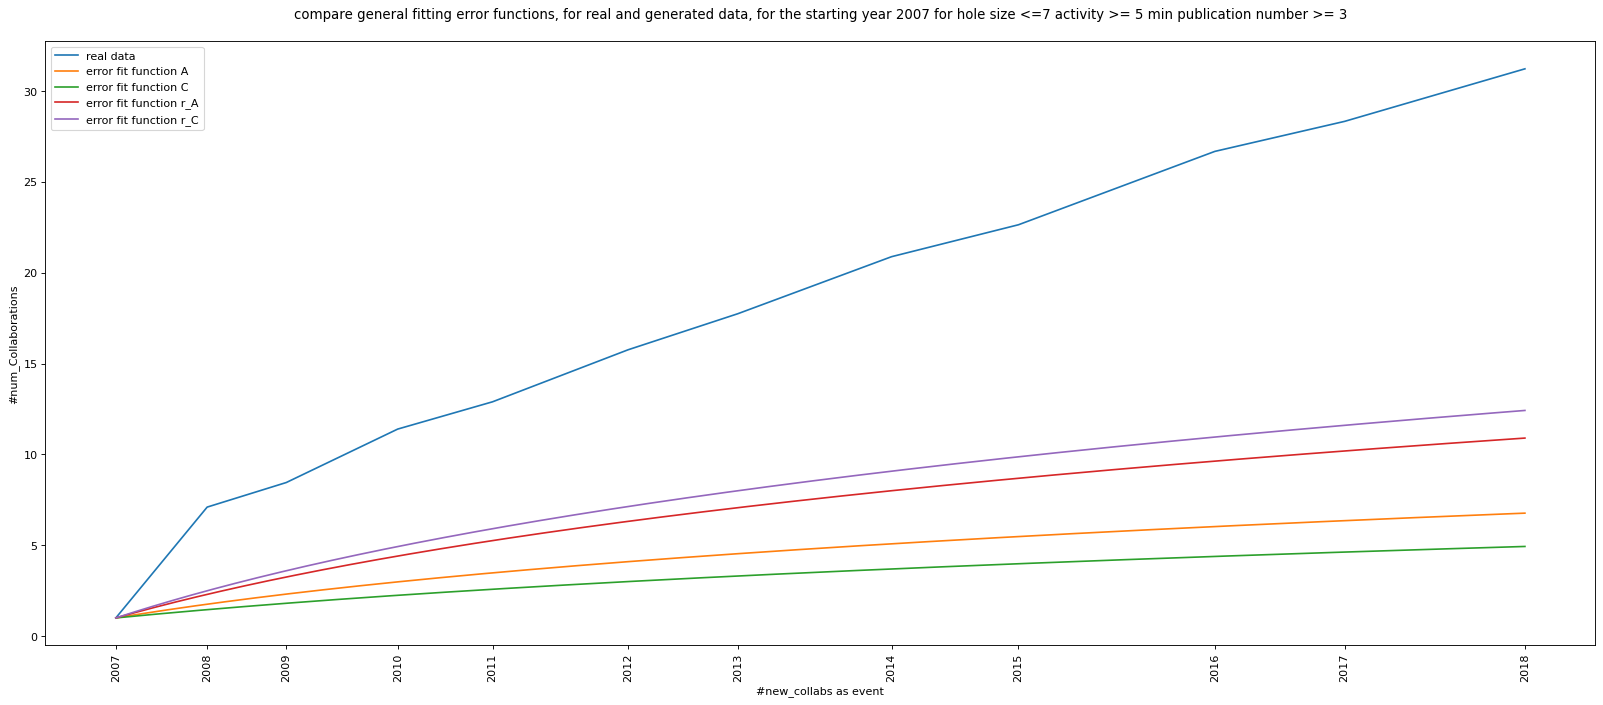

In [60]:
plot_all("2007")

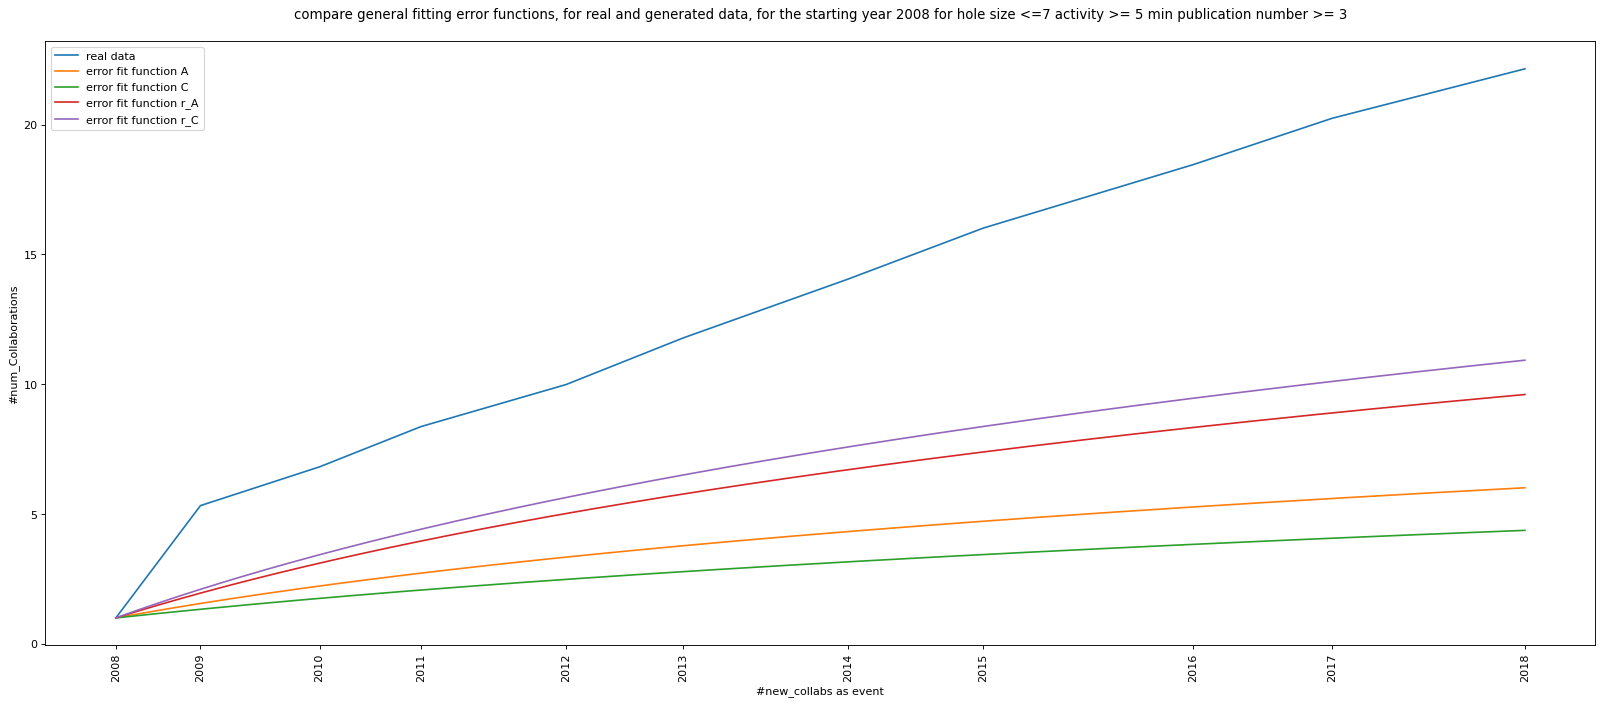

In [61]:
plot_all("2008")

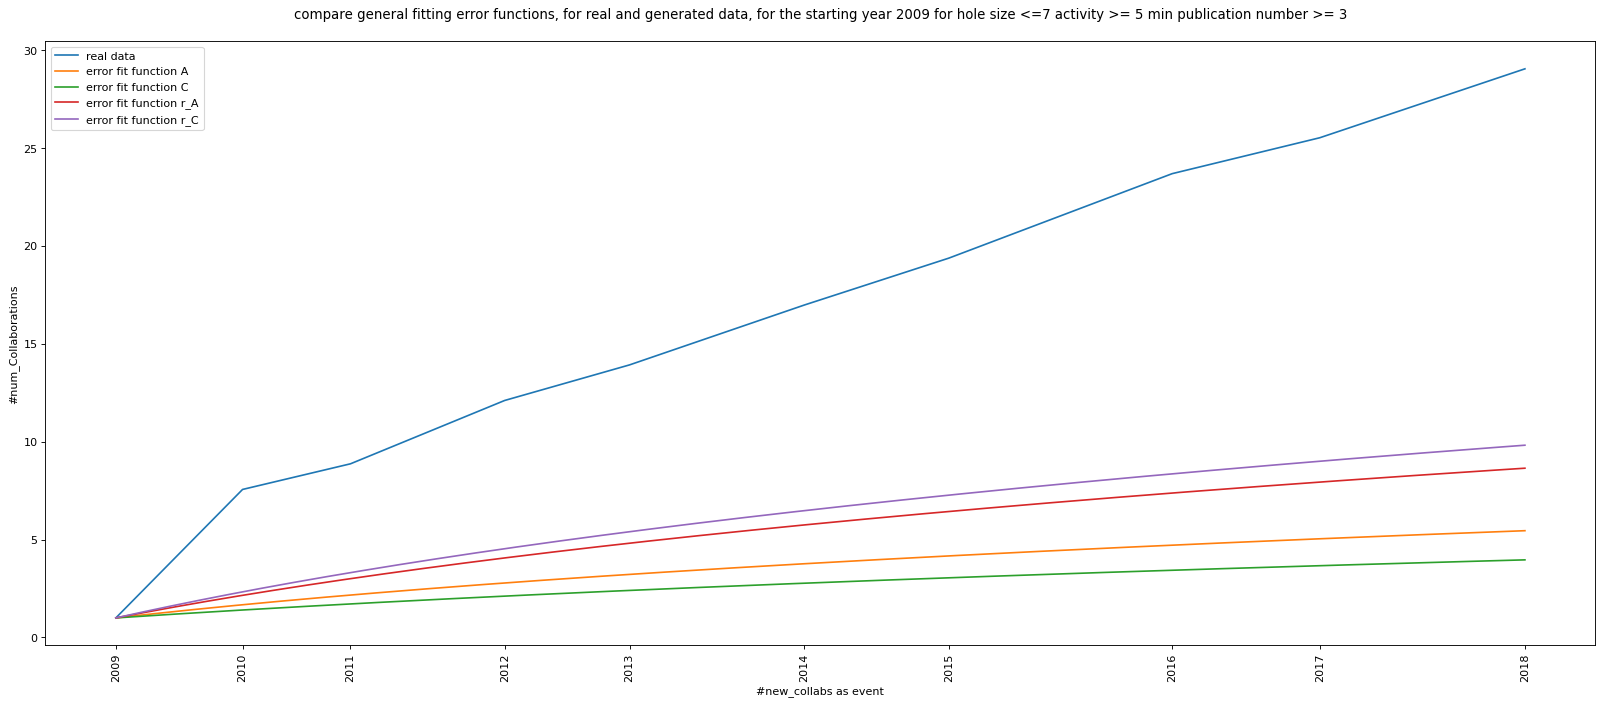

In [62]:
plot_all("2009")

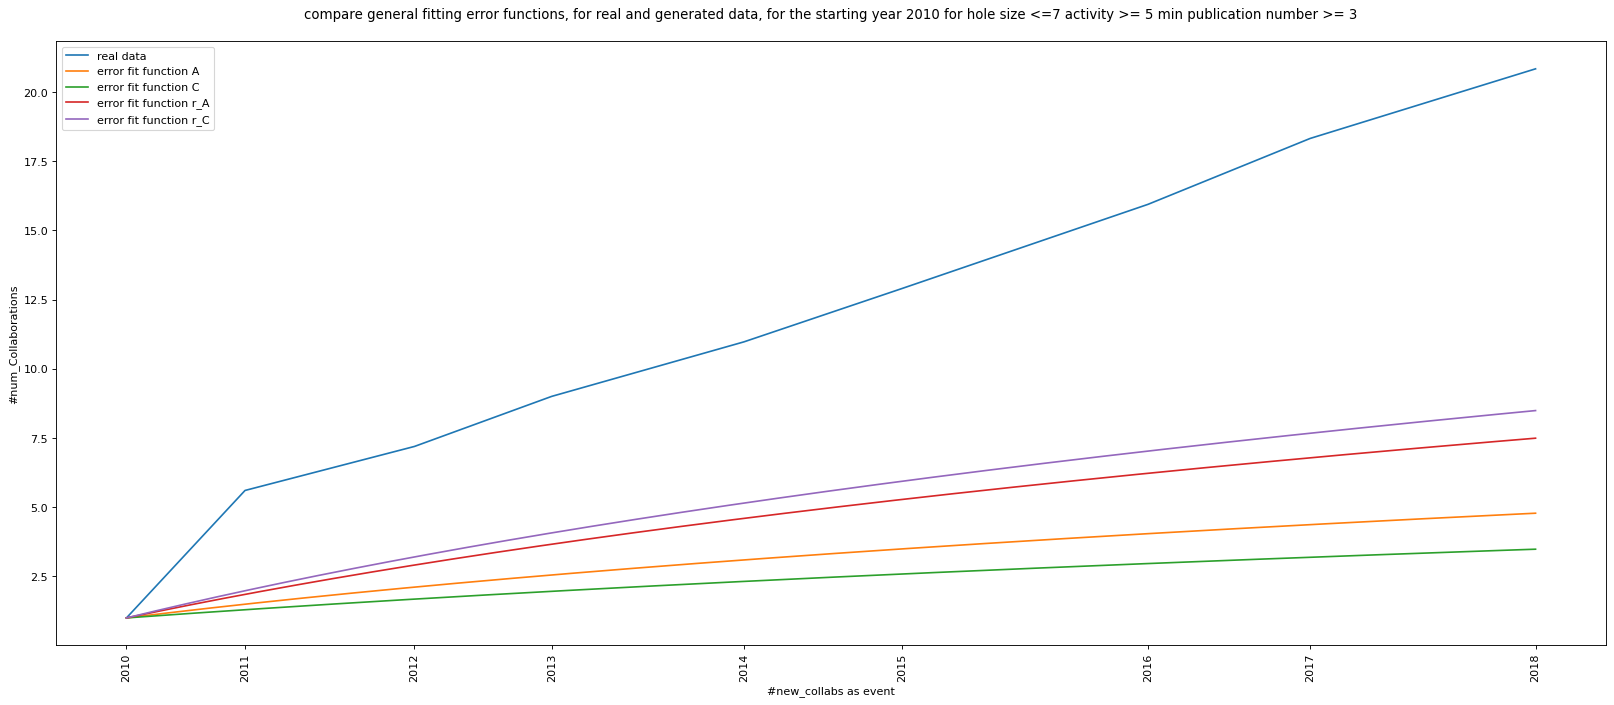

In [64]:
plot_all("2010")

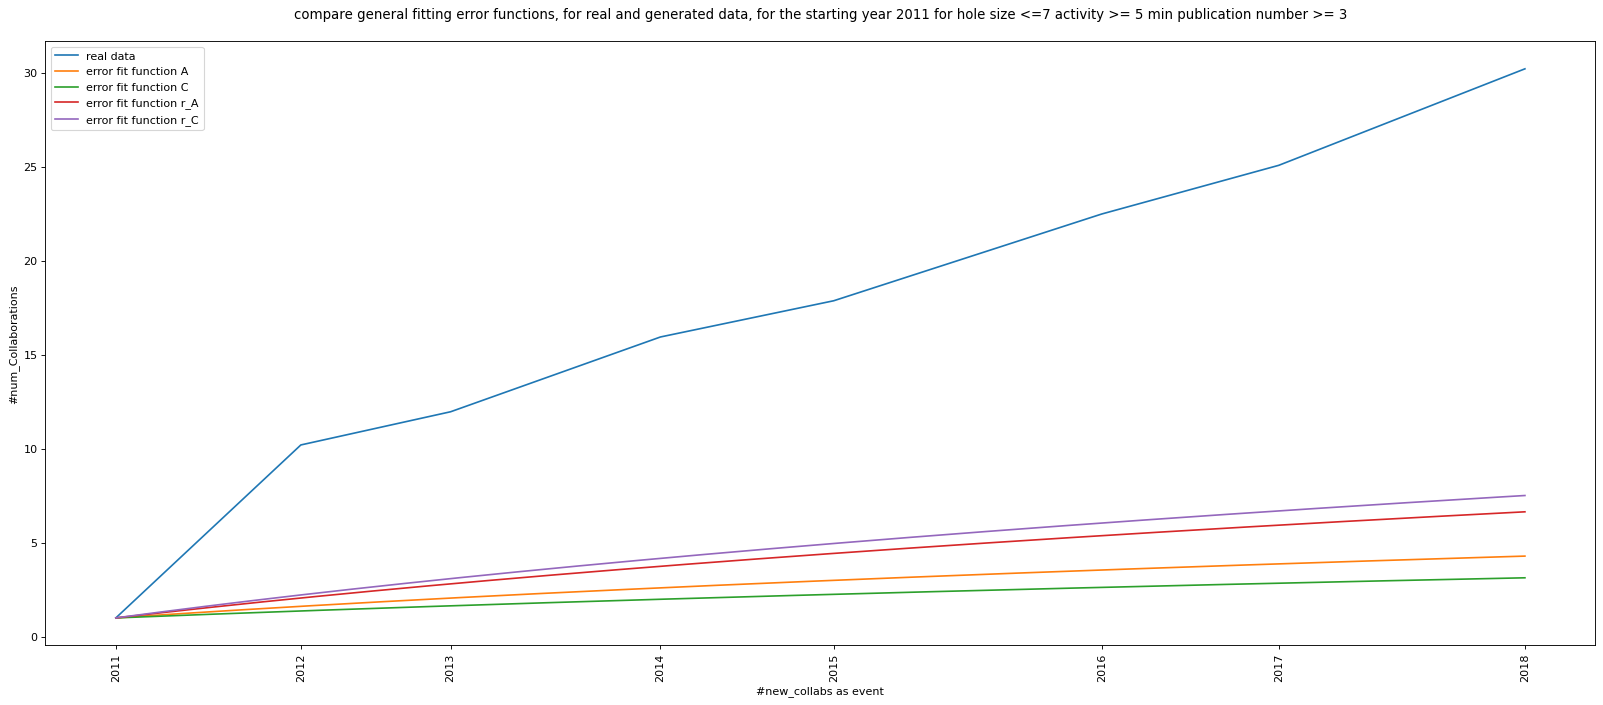

In [65]:
plot_all("2011")

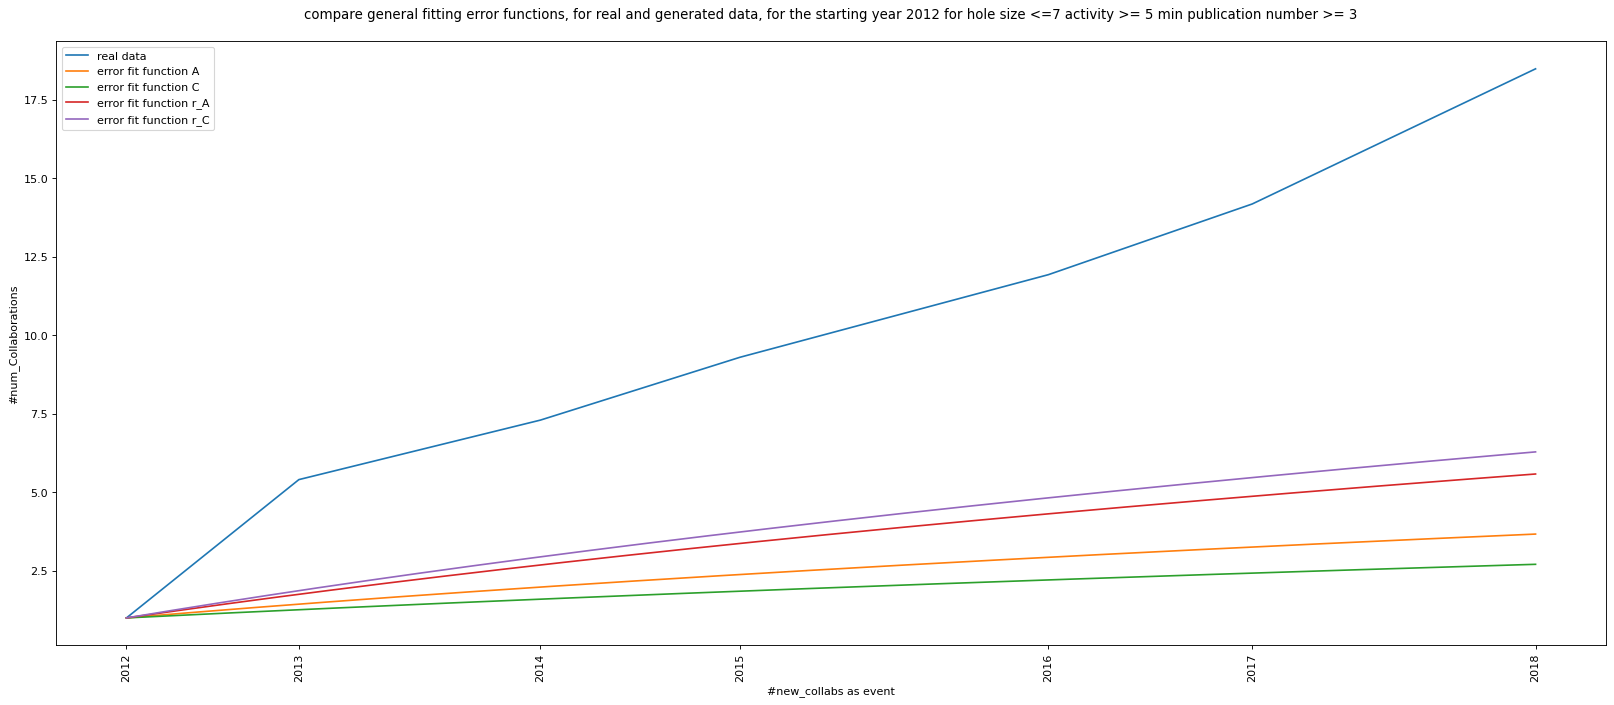

In [66]:
plot_all("2012")